# Data Parsing Class

In [1]:
import pandas as pd
import itertools
import numpy as np
import copy,re
import shap
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm

class dataParsing:
    
    def __init__(self):
        self.X = pd.DataFrame()
        self.Y = pd.DataFrame()
        self.data = pd.DataFrame()
        self.labels = False
        self.targets = [
            'Unaided_Branding', 'Brand_Cues__Mean','Aided_Branding__Mean',
           'Active_Involvement__Mean','New_Information__Mean', 'Enjoyment__Mean',
           'Brand_Appeal__Mean', 'Understanding__Mean','Relevance_of_Information__Mean',
           'Credibility_of_Information__Mean','Brand_Difference__Mean',
           'Interest_peak','Interest_mean_score','Purchase_intent','Persuasion_mean',
           'Persuasion_very_likely','Interest_peak_frames']
        
    def separate_X_Y(self):
        for tr in self.targets:
            for col in self.data.columns:
                if tr in col:
                    self.Y[tr] = self.data[col]
                else:
                    self.X[col] = self.data[col]

        return self.X,self.Y
            
    
    def load_data(self,path_to_file = None,sheet_name="Data",labels=True):
        
        if path_to_file:
            self.data = pd.read_excel(path_to_file,sheet_name=0,index_col=0)
            X,Y = self.separate_X_Y()
            return X,Y
        else:
            print("Please provide path to file\n")
            return None
            
    def load_Y(self,path_to_file=None,video_name=False,column_name="Video Name"):
        self.Y = pd.DataFrame()
        if path_to_file:
            Y_data = pd.read_excel(path_to_file,sheet_name=0,index_col=0)
            for tr in self.targets:
                for col in Y_data.columns:
                    if re.sub("[^a-zA-Z]", "",tr) in re.sub("[^a-zA-Z]", "",col):
                        self.Y[tr] = Y_data[col]
            if video_name:
                self.Y["Video_name"] = Y_data[column_name]
        else:
            print("Please provide path to file\n")

        return copy.deepcopy(self.Y)
                        
    def isLabels(self):
        if self.Y.shape[0]!=0 :
            return True
        return False
    

# Feature Engineering Class

In [2]:
class featureEngineering(dataParsing):
    
    def __init__(self,related_brand="microsoft"):
        super().__init__()
        self.feature_columns = ['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', 'Female_frame_count',
       'Male_frame_count', 'Female_dur', 'Male_dur',
       'Age: 5-15_frame_count', 'Age: 0-5_frame_count',
       'Age: 15-24_frame_count', 'Age: 25-34_frame_count',
       'Age: 35-44_frame_count', 'Age: 45-60_frame_count',
       'Age: 5-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'African_frame_count',
       'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_dur', 'Caucasian_dur',
       'Eastasian_dur', 'Latino_dur', 'microsoft', 'microsoft_dur',
       'microsoft_first_ocr', 'microsoft_last_ocr', 'microsoft_total_ocr',
       'Intel_dur', 'Intel_first_ocr', 'Intel_last_ocr',
       'Intel_total_ocr', 'ASUS T102', 'Dell PCs', 'Dell XPS',
       'Dell XPS 13', 'HP Spectre x360', 'HP Spectre x360, Windows',
       'Lenovo PCs', 'Lenovo Yoga 720', 'Lenovo Yoga 910', 'MacBook Air',
       'MacBook Pro', 'Macbook Air', 'Microsoft Surface', 'Suface Laptop',
       'Surface Book', 'Surface Go', 'Surface Laptop', 'Surface Pen',
       'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       'Surface Pro 4, MacBook Air13, MacBook Air',
       'Surface Pro 4, Surface Book', 'Surface Pro 4, Windows 10',
       'Surface Pro 6', 'Surface laptop', 'Surface pro 4',
       'The new Surface Pro', 'The surface Laptop', 'Windows',
       'Windows 10', 'Windows 10 PC', 'Windows 10 PCs',
       'Windows 10, HP_Spectre', 'Windows 10, Windows', 'Yoga',
       'ASUS T102_dur', 'Dell PCs_dur', 'Dell XPS_dur', 'Dell XPS 13_dur',
       'HP Spectre x360_dur', 'HP Spectre x360, Windows_dur',
       'Lenovo PCs_dur', 'Lenovo Yoga 720_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Suface Laptop_dur', 'Surface Book_dur',
       'Surface Go_dur', 'Surface Laptop_dur', 'Surface Pen_dur',
       'Surface Pro_dur', 'Surface Pro 4_dur',
       'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface Pro 6_dur', 'Surface laptop_dur', 'Surface pro 4_dur',
       'The new Surface Pro_dur', 'The surface Laptop_dur', 'Windows_dur',
       'Windows 10_dur', 'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Lenovo Yoga 720_first_ocr', 'Lenovo Yoga 720_last_ocr',
       'Lenovo Yoga 720_total_ocr', 'Dell PCs_first_ocr',
       'Dell PCs_last_ocr', 'Dell PCs_total_ocr',
       'Surface Laptop_first_ocr', 'Surface Laptop_last_ocr',
       'Surface Laptop_total_ocr', 'The new Surface Pro_first_ocr',
       'The new Surface Pro_last_ocr', 'The new Surface Pro_total_ocr',
       'Surface Pro_first_ocr', 'Surface Pro_last_ocr',
       'Surface Pro_total_ocr', 'Suface Laptop_first_ocr',
       'Suface Laptop_last_ocr', 'Suface Laptop_total_ocr',
       'Surface laptop_first_ocr', 'Surface laptop_last_ocr',
       'Surface laptop_total_ocr', 'The surface Laptop_first_ocr',
       'The surface Laptop_last_ocr', 'The surface Laptop_total_ocr',
       'Surface Go_first_ocr', 'Surface Go_last_ocr',
       'Surface Go_total_ocr', 'Surface Pro 6_first_ocr',
       'Surface Pro 6_last_ocr', 'Surface Pro 6_total_ocr',
       'Dell XPS_first_ocr', 'Dell XPS_last_ocr', 'Dell XPS_total_ocr',
       'Lenovo PCs_first_ocr', 'Lenovo PCs_last_ocr',
       'Lenovo PCs_total_ocr','Laptop','Laptop_dur','Laptop_first_ocr',
        'Laptop_last_ocr','Laptop_total_ocr','Tablet','Tablet_dur','Tablet_first_ocr',
        'Tablet_last_ocr','Tablet_total_ocr','Mobile','Mobile_dur','Mobile_first_ocr',
        'Mobile_last_ocr','Mobile_total_ocr','PC','PC_dur','PC_first_ocr',
        'PC_last_ocr','PC_total_ocr'
                               
                               ]
        self.target_columns = self.targets
        
        self.brands_columns=["Intel","Apple","Asus","Hp","Dell"]
        self.related_brand = related_brand
    
        
    def addUnrelatedBrands(self,X,brands_columns=None):
        if isinstance(brands_columns,list) == False:
            brands_columns = self.brands_columns
        for param in ['_dur','_first_ocr','_last_ocr','_total_ocr']:
            unrelated_columns = [col+param for col in brands_columns]
            X['Unrelated'+param] = X[X.loc[:,unrelated_columns].columns].sum(axis=1)
            X = X.drop(unrelated_columns,axis=1)
        
        return X
    
    def nullPer(self,df):
        """Quantifies missing values"""
#         try:        
        return(df.isnull().mean()*100)
#         except:
#             pass
    
    def renameRelatedBrand(self,X,brand_name=None):
        if isinstance(brand_name,str) == False:
            brand_name = self.related_brand
        columns = [brand_name+col for col in ['','_dur','_first_ocr','_last_ocr','_total_ocr']]
        X.rename(columns=dict(zip(columns, ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
            'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)
        return X
    
    def addNewFeature(self,X,columns=None,_type='per',new_column_name=None,):
        if isinstance(columns,list):
            if _type =='sum':
                X[column_name] = X[X.loc[:,_columns].columns].sum(axis=1)
            else:
                for feature in columns:
                    index_1,index_2 = feature[0].rfind("_dur"),feature[1].rfind("_dur")
                    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
                    try:
                        X.insert(len(X.columns)-12,split_1+"_"+split_2+"_dur",X[feature[1]]/X[feature[0]])
                    except:
                        X[split_1+"_"+split_2+"_dur"] = X[feature[1]]/X[feature[0]]
        else:
            print("Please provide columns names and new column name")
        return X
    
    def clean_data(self,X,Y):
        Y =  Y.dropna(how='all') 
        return X.loc[:,self.feature_columns],Y
    
#     def correlation_matrix(self,X):
#         self.utils.plotCorr(X)
        
    def impute_Median_col(self,df, x):
        """Imputes median - treatement for missing values in Pandas series"""
#         try:
        df[x] = df[x].fillna(df[x].median())
    
        return df[x]
#         except:
#             return df[x]
#             pass

    def correlation(self,df,per=0.2,savefig = False):
        corr = df.corr()
        links = corr.stack().reset_index()
        links.columns = ['var1', 'var2','value']

        # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
        links_filtered=links.loc[ (links['value'] > per) & (links['var1'] != links['var2']) ]

        # Build your graph
        # links_filtered = links
        G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
        # color_list = 
        values=[]
        for e in G.edges():
            Y = links_filtered[links_filtered['var1']==e[0]]
            Z = Y[Y['var2']==e[1]]
            values.append(Z['value'].values[0])

        minima = min(values)
        maxima = max(values)

        norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap="RdYlGn")    

        for i,val in enumerate(values):
            values[i] = matplotlib.colors.to_hex(mapper.to_rgba(val))
        # color_map = le.fit_transform(values)
        plt.figure(figsize=(10,10))
        nx.draw_circular(G, with_labels=True,node_color="skyblue",edge_color=values,font_size=8)
        if savefig:
            plt.savefig('correlation.png')
        plt.show()

# Frame Analysis Class

In [3]:
from itertools import groupby
import itertools
import pandas as pd
import numpy as np
from copy import deepcopy

class Agg_Frame_Data():
    
    def __init__(self,df):
        super().__init__()
        self.agg_inp = pd.DataFrame()
        self.agg_inp['Video Name'] = df['Video Name'].unique()
        self.inp_df = df
        self.unstack_cols = {'Ethnicity':['African','Caucasian','Eastasian','Latino'],
                            'Emotion': ['Angry','Disgust','Fear','Happiness','Neutral','Sadness','Surprise'],
                             'Country': ['US','UK','AU'],
                             'Length of the Ad':[15],'AD Type: TV/DIGITAL':['TV']
                            }
        self.cat_cols ={'Length of the Ad':['length_of_ad_15'],'AD Type: TV/DIGITAL':['ad_type_tv']}
        self.agg_inp = self.agg_inp.set_index(df['Video Name'].unique())
        
    def countryEncoding(self,x):
        for c in ['Country_AU','Country_US','Country_UK']:
            if x[c]>0:
                x[c] = 1
            else:
                x[c] =0
        return x
        
    def _unstack(self,col_name,other=[],binary=False):
        print("Collecting "+col_name+" data")
        temp_df = pd.DataFrame()
        col_df = self.inp_df[[col_name,'Video Name']].groupby([col_name,'Video Name']).size().unstack().unstack()
        if len(other)==0:
            col_df = col_df.unstack()[self.unstack_cols[col_name]]
        else:
            col_df = col_df.unstack()[other]
        
        if not binary:
            if col_name == 'Country':
                cols = ['Country_'+col for col in self.unstack_cols[col_name]]
                temp_df[cols]= col_df[self.unstack_cols[col_name]]
                temp_df = temp_df.set_index(col_df.index.values)
                self.agg_inp = pd.concat((self.agg_inp,temp_df),1)
                self.agg_inp = self.agg_inp.apply(self.countryEncoding,1)
            else:
                cols = [col+'_frame_count' for col in self.unstack_cols[col_name]]
                temp_df[cols] = col_df[self.unstack_cols[col_name]]
                temp_df = temp_df.set_index(col_df.index.values)
                self.agg_inp = pd.concat((self.agg_inp,temp_df),1)
                for col in self.unstack_cols[col_name]:
                    new_col = col+'_dur'
                    self.agg_inp[new_col] = self.agg_inp[col+'_frame_count']*0.5
        else:
            temp_df[self.cat_cols[col_name]] = col_df[self.unstack_cols[col_name]]
            temp_df = temp_df.set_index(col_df.index.values)
            self.agg_inp = pd.concat((self.agg_inp,temp_df),1)
            self.agg_inp.loc[self.agg_inp[self.cat_cols[col_name][0]].isnull(),self.cat_cols[col_name]] = 0
            self.agg_inp.loc[self.agg_inp[self.cat_cols[col_name][0]]!= 0,self.cat_cols[col_name]] = 1
        
        return deepcopy(self.agg_inp)
    
    def separate_age_gender(self):
        print("Separating Age and Gender")
        self.inp_df['Age'] = self.inp_df['Age-Gender']
        self.inp_df['Gender'] = self.inp_df['Age-Gender']
        for i in range(len(self.inp_df['Age-Gender'])):
            if len(self.inp_df['Age'][i].split(',')) == 2:
                self.inp_df.loc[i,'Age'] = self.inp_df.loc[i,'Age-Gender'].split(',')[0]
                self.inp_df.loc[i,'Age'] = (int(self.inp_df.Age[i].split(":")[1].split("-")[0]) + int(self.inp_df.Age[i].split(":")[1].split("-")[1].replace("'","")))/2
                self.inp_df.loc[i,'Gender'] = self.inp_df.loc[i,'Age-Gender'].split(',')[1]
            else:
                self.inp_df.loc[i,'Age'] = float('nan')
        
        self.inp_df.Age = inp_df.Age.astype('float')
        age_df_vid = self.inp_df[['Video Name','Age']].groupby(['Video Name','Age']).size().unstack()
        self.agg_inp[['Age: 0-15_frame_count','Age: 15-24_frame_count','Age: 25-34_frame_count','Age: 35-44_frame_count','Age: 45-60_frame_count']]=age_df_vid[[7.5,19.5,29.5,39.5,52.5]]
        gender_df_vid = inp_df[['Gender','Video Name']].groupby(['Video Name','Gender']).size().unstack(fill_value =0).drop('No Face Found',1)
        self.agg_inp[["Female_frame_count","Male_frame_count"]] = gender_df_vid[[" 'Female']"," 'Male']"]]
        cols =["Female_frame_count","Male_frame_count",'Age: 0-15_frame_count','Age: 15-24_frame_count','Age: 25-34_frame_count','Age: 35-44_frame_count','Age: 45-60_frame_count']
        for col in cols:
            index = col.find('_frame_count')
            new_col = col[:index]+'_dur'
            self.agg_inp[new_col] = self.agg_inp[col]*0.5
        
        return deepcopy(self.agg_inp)
    
    def lower(self,row,col):
        row[col] = row[col].lower()
        return row
    
    def add(self,x):
        return x[0]+x[1]
    
    def agg_logo_text_data(self,columns_):
        logo_df = pd.DataFrame()
        for c in columns_:
            print(c)
            if c=='Microsoft-Logo':
                self.inp_df[self.inp_df[c].isna()==False] = self.inp_df[self.inp_df[c].isna()==False].apply(lambda x: self.lower(x,c),1)  
            temp_logo_df = self.inp_df[[c,'Video Name']].groupby(['Video Name',c]).size().unstack(fill_value = 0)
            #else:
            #    logo_df = pd.concat([logo_df,inp_df[[c,'Video Name']].groupby(['Video Name',c]).size().unstack(fill_value = 0)],axis=1)

            ## Duration
            dur_df = temp_logo_df*0.5
            var_cols =temp_logo_df.columns.values
            #print(var_cols)
            dur_df.columns = temp_logo_df.columns.values + '_dur'

            if len(logo_df) == 0:
                logo_df = pd.concat([temp_logo_df,dur_df],axis=1)
            else:
                frame_dur_df = pd.concat([temp_logo_df,dur_df],axis=1)
                logo_df = pd.concat([logo_df,frame_dur_df],axis=1)

            ## Occurences


            vids = temp_logo_df.index
        #     for unq_val in range(len(inp_df.loc[:,c].unique())):

        #         if str(inp_df.loc[:,c].unique()[unq_val]) != 'nan':
        #             #print(unq_val)
            unq_val = 1
            ocr_list = list(itertools.product(var_cols,['_first_ocr','_last_ocr','_total_ocr'])) 
            ocr_cols = map(self.add,ocr_list)
            ocr_df = pd.DataFrame(columns = list(ocr_cols))
            for v in range(len(vids)):
        #                 print(inp_df.loc[:,c].unique()[unq_val])
        #                 print(len(inp_df.loc[inp_df['Video Name'] == vids[v],c].unique()))
                first_ocr =[None]*len(var_cols)
                last_ocr =[None]*len(var_cols)
                total_ocr =[None]*len(var_cols)

                if len(self.inp_df.loc[self.inp_df['Video Name'] == vids[v],c].unique()) >1:
                    #print(inp_df.loc[inp_df['Video Name'] == vids[v],c].unique())
                    for k,var in enumerate(var_cols):
                        ocr_op =   [i for i,x in enumerate(self.inp_df.loc[inp_df['Video Name'] == vids[v],c]) if x==var]
        #                 print(ocr_op)

                        if len(ocr_op) > 0:
                            ocr_df.loc[v,str(var_cols[k]+'_first_ocr')] = ocr_op[0]*0.5
                            ocr_df.loc[v,str(var_cols[k]+'_last_ocr')] = ocr_op[-1]*0.5
                            ocr_df.loc[v,str(var_cols[k]+'_total_ocr')] = len([x for x in list(np.diff(ocr_op)) if x != 1]) +1
                        else:
                            ocr_df.loc[v,str(var_cols[k]+'_first_ocr')] = None
                            ocr_df.loc[v,str(var_cols[k]+'_last_ocr')] = None
                            ocr_df.loc[v,str(var_cols[k]+'_total_ocr')] = None

                else:
                    ocr_df.loc[v,str(var_cols[0]+'_first_ocr')] = None
                    ocr_df.loc[v,str(var_cols[0]+'_last_ocr')] = None
                    ocr_df.loc[v,str(var_cols[0]+'_total_ocr')] = None
            ocr_df.index = vids
            logo_df = pd.concat([logo_df,ocr_df],axis=1)
                #print(logo_df)
        return logo_df

    def agg_column_data(self,columns):
        logo_df = self.agg_logo_text_data(columns)
        self.agg_inp = pd.concat((self.agg_inp,logo_df),axis=1)
        return deepcopy(self.agg_inp)

In [4]:
%load_ext autoreload
%autoreload 2

In [66]:
inp_df = pd.read_excel('../Frame_Analysis/Microsoft Ad Optimization-AI Data_Survey Aggregated Data 21062019.xlsx',sheet_name="Sheet2")
# inp_df2 = pd.read_excel('../Frame_Analysis/Microsoft Ad Optimization-AI Data_Survey Aggregated Data 29052019.xlsx',sheet_name="Sheet2")

In [67]:
arr = ["Laptop","Tablet","Mobile","PC"]
for i,c in enumerate(['Object 1-Laptop','object 2- Tablet','object 3-Mobile','object 4-PC']):
    inp_df.loc[inp_df[c]=="Yes",c] = arr[i]
    inp_df.loc[inp_df[c]=="yes",c] = arr[i]
    inp_df.loc[inp_df[c]=="No",c] = float('nan')
    inp_df.loc[inp_df[c]==" ",c] = float('nan')

In [68]:
inp_df[['Other-text']] = inp_df[['Other-text']]+'_text'
inp_df[['Microsoft-Text']] = inp_df[['Microsoft-Text']]+'_text'

In [69]:
replace_val = ['Age: 0-5']
for row in inp_df.index.values:
    if replace_val[0] in inp_df.loc[row,"Age-Gender"]:
        inp_df.loc[row,"Age-Gender"] = inp_df.loc[row,"Age-Gender"].replace(replace_val[0],"Age: 0-15")

In [70]:
np.unique(inp_df[['Other-text']].fillna("nan"))

array(['Asus_text', 'Currys PCs world_text', 'Dell XPS_text', 'Dell_text',
       'Hp_text', 'Lenovo_text', 'nan'], dtype=object)

In [71]:
from tqdm import tqdm
import sys

In [72]:
combine_cols = [['Dell PCs','Dell XPS 13','Dell XPS'],
               ['Lenovo PCs','Lenovo Yoga 720','Lenovo Yoga 910'],
                ['Surface Pro 4, Apple_MacBookAir13','Surface Pro 4, MacBook Air13, MacBook Air','Surface Pro 4, MacBook Air','MacBook Air','MacBook Pro','Macbook Air'],
                ['Microsoft Surface','Surface Go','Surface Pen','Surface Pro 4, Apple_MacBookAir13','Surface Pro 4, HP Spectre x360','Surface Pro 4, MacBook Air13, MacBook Air','Surface Pro 4, MacBook Air','Surface Pro 4, Surface Book','Surface Pro 4, Windows 10','Surface Pro 6','Surface laptop','Surface pro 4','The new Surface Pro','The surface Laptop','Surface Pro 4','Surface Pro','Surface Book','Surface Laptop','Suface Laptop'],
                ['HP Spectre x360, Windows','Surface Pro 4, Windows 10','Windows 10 PCs','Windows 10 PC','Windows 10, HP_Spectre','Windows 10, Windows','Windows','Windows 10'],
                ['HP Spectre x360','HP Spectre x360, Windows','Surface Pro 4, HP Spectre x360','Windows 10, HP_Spectre'],
                ["Dell XPS",'Dell']]
replace_cols_name = ["Dell_sub_brand_group","Lenovo_group","Macbook_group","Surface_group","Windows","HP_group","Dell"]
parent_col = ["Sub-Brands","Sub-Brands","Sub-Brands","Sub-Brands","Sub-Brands","Sub-Brands","Other-text"]
for i,num in enumerate(tqdm(combine_cols)):
    for row in inp_df.index.values:
        for val in num:
            if not isinstance(inp_df.loc[row,parent_col[i]],float) and val in inp_df.loc[row,parent_col[i]]:
                inp_df.loc[row,parent_col[i]] = inp_df.loc[row,parent_col[i]].replace(val,replace_cols_name[i])
    sys.stdout.write("\r"+replace_cols_name[i])

 29%|██▊       | 2/7 [00:00<00:00,  5.41it/s]

Lenovo_group

 43%|████▎     | 3/7 [00:00<00:00,  4.59it/s]

Macbook_group

 57%|█████▋    | 4/7 [00:01<00:01,  1.97it/s]

Surface_group

 86%|████████▌ | 6/7 [00:02<00:00,  2.16it/s]

HP_group

100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

Dell

In [74]:
np.unique(inp_df[['Sub-Brands']].fillna("nan"))

array(['ASUS T102', 'Dell_sub_brand_group', 'HP_group', 'Lenovo_group',
       'Macbook_group', 'Surface_group', 'Windows', 'Yoga', 'nan'],
      dtype=object)

In [75]:
frame_analysis = Agg_Frame_Data(inp_df)

In [76]:
frame_analysis._unstack('Ethnicity')
frame_analysis._unstack('Emotion')
frame_analysis._unstack('Country')
frame_analysis._unstack('Length of the Ad',binary=True)
frame_analysis._unstack('AD Type: TV/DIGITAL',binary=True)
frame_analysis.separate_age_gender()

Separating Age and Gender


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Video Name  \
185 Brand Moments_Microsoft_US_60_Learning Tool...  185 Brand Moments_Microsoft_US_60_Learning Too...   
200 Win10_US_30_Toney_TV                                                     200 Win10_US_30_Toney_TV   
201 Win10_UK_30_Toney_TV                                                     201 Win10_UK_30_Toney_TV   
202 Win10_US_30_Katie_TV                                                     202 Win10_US_30_Katie_TV   
203 Win10_UK_30_Katie Compete_TV                                     203 Win10_UK_30_Katie Compete_TV   
204 Win10_AUS_30_Katie Non-Compete_TV                           204 Win10_AUS_30_Katie Non-Compete_TV   
205 Win10_AUS_30_Katie Compete_TV                                   205 Win10_AUS_30_Katie Compete_TV   
206 Win10_UK_30_Katie Non-Compete_TV                             206 Win10_UK_30_Katie Non-Compete_TV   
207 Win10_US_15_Toney Inking_TV                                       207 Win10_US_15_Toney Inking_TV   
208 Win10_US_15_Toney Drawing_TV                                     208 Win10_US_15_Toney Drawing_TV   
209 Surface Laptop_US_30_Brodie_TV                                 209 Surface Laptop_US_30_Brodie_TV   
210 Surface Laptop_US_30_Xyla_TV                                     210 Surface Laptop_US_30_Xyla_TV   
211 Surface Laptop_UK_30_Brodie_TV                                 211 Surface Laptop_UK_30_Brodie_TV   
212 Surface Laptop_UK_30_Xyla_TV                                     212 Surface Laptop_UK_30_Xyla_TV   
213 Surface Laptop_AUS_30_Brodie_TV                               213 Surface Laptop_AUS_30_Brodie_TV   
214 Surface Laptop_AUS_30_Xyla_TV                                   214 Surface Laptop_AUS_30_Xyla_TV   
215 Surface Laptop_US_30_Xyla Full VO_TV                     215 Surface Laptop_US_30_Xyla Full VO_TV   
216 Surface Laptop_US_30_Brodie Full VO_TV                 216 Surface Laptop_US_30_Brodie Full VO_TV   
217 Surface Laptop_US_30_Combo X&B_TV                           217 Surface Laptop_US_30_Combo X&B_TV   
218 Surface Laptop_US_30_Xyla Real People_TV             218 Surface Laptop_US_30_Xyla Real People_TV   
219 Surface Laptop_US_15_Xyla Feel_TV                           219 Surface Laptop_US_15_Xyla Feel_TV   
220 Surface Laptop_US_15_Brodie_TV                                 220 Surface Laptop_US_15_Brodie_TV   
221 BATCH RE-TEST: Surface Book_US_30_Jorge/San...  221 BATCH RE-TEST: Surface Book_US_30_Jorge/Sa...   
222 BATCH RE-TEST: Surface Book_UK_30_Jorge/San...  222 BATCH RE-TEST: Surface Book_UK_30_Jorge/Sa...   
223 BATCH RE-TEST: Win10_UK_30_College Girls_TV       223 BATCH RE-TEST: Win10_UK_30_College Girls_TV   
224 BATCH RE-TEST: Surface Book_AUS_30_Jorge/Sa...  224 BATCH RE-TEST: Surface Book_AUS_30_Jorge/S...   
225 BATCH RE-TEST: Win10_AUS_30_College Girls_TV     225 BATCH RE-TEST: Win10_AUS_30_College Girls_TV   
230 Surface Pro_US_30_Bengals NFL_TV                             230 Surface Pro_US_30_Bengals NFL_TV   
233 Surface Pro_AUS_30_Leann_TV                                       233 Surface Pro_AUS_30_Leann_TV   
236 Surface Pro_US_30_Bengals NFL Recut_TV                 236 Surface Pro_US_30_Bengals NFL Recut_TV   
...                                                                                               ...   
MS Store No VO - SW Win 10 30 TV US                               MS Store No VO - SW Win 10 30 TV US   
Mancusi - Surface SP4 30 TV US                                         Mancusi - Surface SP4 30 TV US   
Mancusi Pen - Surface SP4 15 TV US                                 Mancusi Pen - Surface SP4 15 TV US   
Mancusi Power - Surface SP4 15 TV US                             Mancusi Power - Surface SP4 15 TV US   
Mancusi Versatility - Surface SP4 15 TV US                 Mancusi Versatility - Surface SP4 15 TV US   
Mark - Surface Book 30 TV US                                             Mark - Surface Book 30 TV US   
Melissa - Surface SP4 30 TV US                                         Melissa - Surface SP4 30 TV US

In [77]:
frame_analysis.agg_column_data(['Microsoft-Logo','Intel_Logo','Sub-Brands','Other-text','Other-logo','Microsoft-Text'])
frame_analysis.agg_column_data(['Object 1-Laptop','object 2- Tablet','object 3-Mobile','object 4-PC'])

Microsoft-Logo
Intel_Logo
Sub-Brands


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:156: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Other-text
Other-logo
Microsoft-Text
Object 1-Laptop


/home/internbmilap562/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:162: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



object 2- Tablet
object 3-Mobile
object 4-PC


Video Name  \
185 Brand Moments_Microsoft_US_60_Learning Tool...  185 Brand Moments_Microsoft_US_60_Learning Too...   
200 Win10_US_30_Toney_TV                                                     200 Win10_US_30_Toney_TV   
201 Win10_UK_30_Toney_TV                                                     201 Win10_UK_30_Toney_TV   
202 Win10_US_30_Katie_TV                                                     202 Win10_US_30_Katie_TV   
203 Win10_UK_30_Katie Compete_TV                                     203 Win10_UK_30_Katie Compete_TV   
204 Win10_AUS_30_Katie Non-Compete_TV                           204 Win10_AUS_30_Katie Non-Compete_TV   
205 Win10_AUS_30_Katie Compete_TV                                   205 Win10_AUS_30_Katie Compete_TV   
206 Win10_UK_30_Katie Non-Compete_TV                             206 Win10_UK_30_Katie Non-Compete_TV   
207 Win10_US_15_Toney Inking_TV                                       207 Win10_US_15_Toney Inking_TV   
208 Win10_US_15_Toney Drawing_TV                                     208 Win10_US_15_Toney Drawing_TV   
209 Surface Laptop_US_30_Brodie_TV                                 209 Surface Laptop_US_30_Brodie_TV   
210 Surface Laptop_US_30_Xyla_TV                                     210 Surface Laptop_US_30_Xyla_TV   
211 Surface Laptop_UK_30_Brodie_TV                                 211 Surface Laptop_UK_30_Brodie_TV   
212 Surface Laptop_UK_30_Xyla_TV                                     212 Surface Laptop_UK_30_Xyla_TV   
213 Surface Laptop_AUS_30_Brodie_TV                               213 Surface Laptop_AUS_30_Brodie_TV   
214 Surface Laptop_AUS_30_Xyla_TV                                   214 Surface Laptop_AUS_30_Xyla_TV   
215 Surface Laptop_US_30_Xyla Full VO_TV                     215 Surface Laptop_US_30_Xyla Full VO_TV   
216 Surface Laptop_US_30_Brodie Full VO_TV                 216 Surface Laptop_US_30_Brodie Full VO_TV   
217 Surface Laptop_US_30_Combo X&B_TV                           217 Surface Laptop_US_30_Combo X&B_TV   
218 Surface Laptop_US_30_Xyla Real People_TV             218 Surface Laptop_US_30_Xyla Real People_TV   
219 Surface Laptop_US_15_Xyla Feel_TV                           219 Surface Laptop_US_15_Xyla Feel_TV   
220 Surface Laptop_US_15_Brodie_TV                                 220 Surface Laptop_US_15_Brodie_TV   
221 BATCH RE-TEST: Surface Book_US_30_Jorge/San...  221 BATCH RE-TEST: Surface Book_US_30_Jorge/Sa...   
222 BATCH RE-TEST: Surface Book_UK_30_Jorge/San...  222 BATCH RE-TEST: Surface Book_UK_30_Jorge/Sa...   
223 BATCH RE-TEST: Win10_UK_30_College Girls_TV       223 BATCH RE-TEST: Win10_UK_30_College Girls_TV   
224 BATCH RE-TEST: Surface Book_AUS_30_Jorge/Sa...  224 BATCH RE-TEST: Surface Book_AUS_30_Jorge/S...   
225 BATCH RE-TEST: Win10_AUS_30_College Girls_TV     225 BATCH RE-TEST: Win10_AUS_30_College Girls_TV   
230 Surface Pro_US_30_Bengals NFL_TV                             230 Surface Pro_US_30_Bengals NFL_TV   
233 Surface Pro_AUS_30_Leann_TV                                       233 Surface Pro_AUS_30_Leann_TV   
236 Surface Pro_US_30_Bengals NFL Recut_TV                 236 Surface Pro_US_30_Bengals NFL Recut_TV   
...                                                                                               ...   
MS Store No VO - SW Win 10 30 TV US                               MS Store No VO - SW Win 10 30 TV US   
Mancusi - Surface SP4 30 TV US                                         Mancusi - Surface SP4 30 TV US   
Mancusi Pen - Surface SP4 15 TV US                                 Mancusi Pen - Surface SP4 15 TV US   
Mancusi Power - Surface SP4 15 TV US                             Mancusi Power - Surface SP4 15 TV US   
Mancusi Versatility - Surface SP4 15 TV US                 Mancusi Versatility - Surface SP4 15 TV US   
Mark - Surface Book 30 TV US                                             Mark - Surface Book 30 TV US   
Melissa - Surface SP4 30 TV US                                         Melissa - Surface SP4 30 TV US

In [78]:
data = frame_analysis.agg_inp

In [79]:
campaign = inp_df[['Video Name','Campaign']].groupby(['Video Name']).first()

In [80]:
data['Campaign'] = campaign['Campaign']

In [81]:
data_US = data.loc[data['Country_US']==1,:]

In [41]:
agg = pd.read_excel('./Package_model/Agg_data_from_frame_163.xlsx',sheet_name="Sheet1")

FileNotFoundError: [Errno 2] No such file or directory: './Package_model/Agg_data_from_frame_163.xlsx'

In [82]:
len(data_US.columns.values)

163

In [83]:
data_US.columns.values

array(['Video Name', 'African_frame_count', 'Caucasian_frame_count',
       'Eastasian_frame_count', 'Latino_frame_count', 'African_dur',
       'Caucasian_dur', 'Eastasian_dur', 'Latino_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'Country_US', 'Country_UK',
       'Country_AU', 'length_of_ad_15', 'ad_type_tv',
       'Age: 0-15_frame_count', 'Age: 15-24_frame_count',
       'Age: 25-34_frame_count', 'Age: 35-44_frame_count',
       'Age: 45-60_frame_count', 'Female_frame_count', 'Male_frame_count',
       'Female_dur', 'Male_dur', 'Age: 0-15_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur', 'microsoft',
       'microsoft_dur', 'microsoft_first_ocr', 'microsoft_last_ocr',
       'microsoft_total_o

In [84]:
data_US.to_excel('Agg_data_from_frame_163.xlsx')

In [193]:
inp_df = pd.read_excel('./Agg_data_from_frame_294.xlsx',sheet_name="Sheet1")

In [194]:
inp_df = inp_df.drop('Unnamed: 0',1)

In [195]:
i=0;
col_=[]
for c in total_ocr:
    if c in data_US.columns.values:
        col_.append(c)
        i+=1
    else:
#         print(c)
        pass
print(i)

NameError: name 'total_ocr' is not defined

In [196]:
len(X_cr.columns.values)

NameError: name 'X_cr' is not defined

In [197]:
X['Video Name'] = X.index.values

In [198]:
colm = [' Female_frame_count',' Male_frame_count',' Female_dur',' Male_dur']
age = ['Age: 0-15_frame_count','Age: 0-15_dur']

In [199]:
for c in colm:
    X[c.strip()] = X[c]
X = X.drop(colm,1)

KeyError: ' Female_frame_count'

In [200]:
X[ ['Age: 5-15_frame_count','Age: 5-15_dur']] = X[ ['Age: 0-15_frame_count','Age: 0-15_dur']]
X = X.drop(age,1)

KeyError: "None of [Index(['Age: 0-15_frame_count', 'Age: 0-15_dur'], dtype='object')] are in the [columns]"

In [201]:
X_cr = inp_df

In [202]:
# X_cr = X_cr[X_cr['Video Name']!= '284 Surface Laptop_UK_30_Courtney v2 US VO_TV']
X_cr=X_cr[X_cr['Video Name']!= 'Surface Laptop_UK_30_Courtney v2 US VO_TV']

In [203]:
np.argmax(X_cr.columns.values=='Dell XPS')

56

In [204]:
X_cr=X_cr.loc[:,~X_cr.columns.duplicated()]

In [205]:
ocr_cols = [col for col in X.columns.values if 'ocr' not in col]

In [53]:
X_cr.loc[:,ocr_cols] = X_cr.loc[:,ocr_cols].fillna(0)
X.loc[:,ocr_cols] = X.loc[:,ocr_cols].fillna(0)

In [93]:
X_US = X[X['Country_US']==1]

In [38]:
X_cr = X_cr.set_index(X_cr['Video Name'])

In [95]:
X_US['Video Name'] = X_US.index.values

In [92]:
X_cr[model.preprocessing.feature_columns].loc[:,(X_US[model.preprocessing.feature_columns] == X_cr[model.preprocessing.feature_columns]).sum()!=109]

Country_AU  Country_UK  \
Video Name                                                                   
185 Brand Moments_Microsoft_US_60_Learning Tool...           0           0   
200 Win10_US_30_Toney_TV                                     0           0   
202 Win10_US_30_Katie_TV                                     0           0   
207 Win10_US_15_Toney Inking_TV                              0           0   
208 Win10_US_15_Toney Drawing_TV                             0           0   
209 Surface Laptop_US_30_Brodie_TV                           0           0   
210 Surface Laptop_US_30_Xyla_TV                             0           0   
215 Surface Laptop_US_30_Xyla Full VO_TV                     0           0   
216 Surface Laptop_US_30_Brodie Full VO_TV                   0           0   
217 Surface Laptop_US_30_Combo X&B_TV                        0           0   
218 Surface Laptop_US_30_Xyla Real People_TV                 0           0   
219 Surface Laptop_US_15_Xyla Feel_TV                        0           0   
220 Surface Laptop_US_15_Brodie_TV                           0           0   
221 BATCH RE-TEST: Surface Book_US_30_Jorge/San...           0           0   
230 Surface Pro_US_30_Bengals NFL_TV                         0           0   
236 Surface Pro_US_30_Bengals NFL Recut_TV                   0           0   
237 Surface Pro_US_30_Leann_TV                               0           0   
239 Surface Laptop_US_30_Brodie FINAL_TV                     0           0   
240 Surface Laptop_US_30_Combo Dragon_TV                     0           0   
241 Surface Laptop_US_30_Brodie FINAL GP_TV                  0           0   
242 Surface Laptop_US_30_Combo Dragon GP_TV                  0           0   
246 Surface Pro_US_30_Bengals NFL v3_TV                      0           0   
247 Surface Pro_US_Lights 3SEG_TV                            0           0   
248 Surface Pro_US_30_Bujar_TV                               0           0   
256 Surface Pro_US_15_Leann Versatility_TV                   0           0   
257 Surface Pro_US_15_Leann Productivity_TV                  0           0   
258 Surface Pro_US_15_Bujar Power_TV                         0           0   
259 Surface Pro_US_15_Bujar Design_TV                        0           0   
269 Surface Laptop_US_30_Courtney_TV                         0           0   
274 Surface Laptop_US_30_Courtney v2_TV                      0           0   
...                                                        ...         ...   
MS Store No VO - SW Win 10 30 TV US                          0           0   
Mancusi - Surface SP4 30 TV US                               0           0   
Mancusi Pen - Surface SP4 15 TV US                           0           0   
Mancusi Power - Surface SP4 15 TV US                         0           0   
Mancusi Versatility - Surface SP4 15 TV US                   0           0   
Mark - Surface Book 30 TV US                                 0           0   
Melissa - Surface SP4 30 TV US                               0           0   
Melissa Durability - Surface SP4 15 TV US                    0           0   
Melissa Power - Surface SP4 15 TV US                         0           0   
Newest Users - SW Win 10 30 TV US                            0           0   
News Go fast - Surface SP4 30 TV US                          0           0   
Quads - ATL Win 10 30 TV US                                  0           0   
Quads Hello - ATL Win 10 15 TV US                            0           0   
Quads Pen - ATL Win 10 15 TV US                              0           0   
Rhythm - Surface Book 30 TV US                               0           0   
Shame - Surface SP4 30 TV US                                 0           0   
Song for Surface NFL Fans - Surface SP4 30 TV US             0           0   
Surface - Surface SP4 30 TV US                               0           0   
The One Hero - SW Win 10 30 TV US                            0           0

In [98]:
((X_US[model.preprocessing.feature_columns] == X_cr[model.preprocessing.feature_columns]).sum()==109).sum()

243

In [122]:
np.argmax(((X['microsoft_first_ocr'] != X_cr['microsoft_first_ocr'])))

'284it Surface Laptop_UK_30_Courtney v2 US VO_TV'

In [123]:
X_cr.loc["284it Surface Laptop_UK_30_Courtney v2 US VO_TV",'microsoft_first_ocr']

-1.0

In [124]:
X.loc["284it Surface Laptop_UK_30_Courtney v2 US VO_TV",'microsoft_first_ocr']

0.5

In [37]:
X_cr.loc[X_cr['Windows 10_first_ocr'].isna()==False,ocr_cols]

microsoft_first_ocr  \
Beowulf - SW Win 10 30 TV US                                    26.5   
Beowulf Pen - SW Win 10 15 TV US                                  11   
Best Buy No VO - SW HP 30 TV US                                 17.5   
Best Buy No VO - SW HP Computers 30 TV US                       17.5   
Best Buy No VO - SW Win 10 30 TV US                             17.5   
Best Buy VO - SW HP 30 TV US                                    17.5   
Best Buy VO - SW Win 10 30 TV US                                17.5   
Best Buy and MS Store No VO - SW HP 30 TV US                    17.5   
Bug Chicks Cortana - SW Win 10 15 OLV US                         6.5   
Bug Chicks Cortana - SW Win 10 15 TV US                          8.5   
Bug Chicks Hello - SW Win 10 15 OLV US                            13   
Bug Chicks Hello - SW Win 10 15 TV US                             11   
Bug Chicks Inking - SW Win 10 15 OLV US                            6   
Bug Chicks Inking - SW Win 10 15 TV US                           NaN   
Bug Chicks Inking No Supers - SW Win 10 15 TV US                 4.5   
College Girls Pen - SW Win 10 15 TV US                            11   
Doyin - SW Win 10 30 TV US                                        18   
Doyin Cortana - SW Win 10 15 TV US                               6.5   
Doyin Hello - SW Win 10 15 TV US                                  11   
Howards - SW Win 10 30 TV US                                    14.5   
Howards Battery - SW Win 10 15 TV US                               9   
Howards Touch - SW Win 10 15 TV US                                 9   
MS Store No VO - SW Win 10 30 TV US                             17.5   
Quads - ATL Win 10 30 TV US                                      8.5   
Quads Hello - ATL Win 10 15 TV US                                9.5   
Quads Pen - ATL Win 10 15 TV US                                  5.5   
The One Hero - SW Win 10 30 TV US                                 25   
Yasmin - ATL Win 10 30 TV US                                      18   
Yasmin Power - ATL Win 10 15 TV US                                10   
Yasmin Rev - ATL Win 10 30 TV US                                22.5   
Yasmin Touch - ATL Win 10 15 TV US                              10.5   

                                                 microsoft_last_ocr  \
Beowulf - SW Win 10 30 TV US                                     30   
Beowulf Pen - SW Win 10 15 TV US                               16.5   
Best Buy No VO - SW HP 30 TV US                                  30   
Best Buy No VO - SW HP Computers 30 TV US                        30   
Best Buy No VO - SW Win 10 30 TV US                              30   
Best Buy VO - SW HP 30 TV US                                     30   
Best Buy VO - SW Win 10 30 TV US                                 30   
Best Buy and MS Store No VO - SW HP 30 TV US                     30   
Bug Chicks Cortana - SW Win 10 15 OLV US                         16   
Bug Chicks Cortana - SW Win 10 15 TV US                          15   
Bug Chicks Hello - SW Win 10 15 OLV US                         16.5   
Bug Chicks Hello - SW Win 10 15 TV US                            15   
Bug Chicks Inking - SW Win 10 15 OLV US                        16.5   
Bug Chicks Inking - SW Win 10 15 TV US                          NaN   
Bug Chicks Inking No Supers - SW Win 10 15 TV US               14.5   
College Girls Pen - SW Win 10 15 TV US                         16.5   
Doyin - SW Win 10 30 TV US                                       29   
Doyin Cortana - SW Win 10 15 TV US                             14.5   
Doyin Hello - SW Win 10 15 TV US                               14.5   
Howards - SW Win 10 30 TV US                                   29.5   
Howards Battery - SW Win 10 15 TV US                             14   
Howards Touch - SW Win 10 15 TV US                               14   
MS Store No VO - SW Win 10 30 TV US                              30   
Quads - ATL Win 10 30 TV US             

In [114]:
np.argmax(X_cr['microsoft_first_ocr'].isna()== False)

'Emma - SW Win 10 30 TV US'

In [113]:
X_cr['Intel_first_ocr'].isna()

185 Brand Moments_Microsoft_US_60_Learning Tools_TV_4SEG    True
200 Win10_US_30_Toney_TV                                    True
201 Win10_UK_30_Toney_TV                                    True
202 Win10_US_30_Katie_TV                                    True
203 Win10_UK_30_Katie Compete_TV                            True
204 Win10_AUS_30_Katie Non-Compete_TV                       True
205 Win10_AUS_30_Katie Compete_TV                           True
206 Win10_UK_30_Katie Non-Compete_TV                        True
207 Win10_US_15_Toney Inking_TV                             True
208 Win10_US_15_Toney Drawing_TV                            True
209 Surface Laptop_US_30_Brodie_TV                          True
210 Surface Laptop_US_30_Xyla_TV                            True
211 Surface Laptop_UK_30_Brodie_TV                          True
212 Surface Laptop_UK_30_Xyla_TV                            True
213 Surface Laptop_AUS_30_Brodie_TV                         True
214 Surface Laptop_AUS_30

# Data Preprocessing Class

In [4]:
from imblearn.over_sampling import SMOTE
import numpy as np

class DataPreprocessing(featureEngineering):
    
    def __init__(self):
        super().__init__()
        
    def checkNull(self,df):
        return self.nullPer(df).sort_values(ascending=False)
    
    def removeNULLColumns(self,df,percentage=0.7):
        return df.loc[:, self.nullPer(df)< percentage*100]
    
    def replace(self,df,replace_this,replace_with):
        return df.replace(replace_this,replace_with)
    
    def imputeMedian(self,df,columns=None):
        if not isinstance(columns,list):
            columns = ["Related_Brand"+col for col in ['_frame_count','_dur','_first_ocr','_last_ocr','_total_ocr']]
        
        for col in columns:
            df[col] = self.impute_Median_col(df,col)
        return df
    
    def imputeConstant(self,df,columns=None,constant=0):
        if isinstance(columns,list) == False:
            return df.fillna(constant)
        return df[columns].fillna(constant)
    
    def normalize(self,df,axis):
        return normalize(df,axis=1)
    
    def overSampling(self,xDF,yDF,col_as_label = 'length_of_ad_15',each_Col = False,rmCols = ['Video Name','length_of_ad_15'],size=400,random_state=None):
        sm = SMOTE(sampling_strategy = {0:size//2,1:size//2},random_state=random_state)
        labels = xDF.loc[:,col_as_label]
        self.data['Video Name'] = xDF['Video Name']
        if each_Col == False:
            temp_inp_df = pd.concat([xDF,yDF],1).drop(rmCols,1)
        else:
            temp_inp_df = pd.concat([xDF,yDF],1)
#         print((xDF['Video Name']==yDF['Video Name']).sum(),temp_inp_df.isna().sum().sum())
#         print(temp_inp_df.isna().sum())
        X_res, y_res = sm.fit_resample(temp_inp_df,labels)
        
        resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
        resamp_target_df = pd.DataFrame(y_res,columns=['length_of_ad_15'])
        resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
        resamp_data_df['Video Name'] = self.data['Video Name']
        resamp_inputs_df = resamp_data_df[xDF.columns]
        resamp_target_df = resamp_data_df[yDF.columns]
        
        return resamp_inputs_df,resamp_target_df

# Modeling Class

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
import copy
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV,cross_validate,learning_curve,validation_curve
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

import warnings
warnings.filterwarnings('ignore')

# Evaluation Class

In [6]:
class Evaluate:
    
    def __init__(self,models,model_type = 'ranf'):
        self.models_eval =[]
        self.model_type = model_type
        
    def evaluate(self,X_test,y_test,metrics='r2_score'):
        
        try:
            X = X_test.drop('Video Name',1)
        except:
            X = X_test
        for i in range(y_test.shape[1]):
            print(y_test.columns[i])
            preds = self.models_eval[i].predict(X)
            if metrics == 'r2_score':
                r2score = r2_score(y_test.iloc[:,i],preds)
                print("R2_SCORE %f" % r2score,"\n")
            elif metrics == 'rmse':
                rmse = math.sqrt(mean_squared_error(preds,y_test.iloc[:,i]))
                print("RMSE %f" % rmse,"\n")
                
    def plot_feature_importance(self,models,figsize,output_columns,feature_columns,savefig=False):
        self.models_eval = models
        try: 
            feature_columns = feature_columns.remove('Video Name')
        except:
            pass
        
        if self.model_type == 'ranf' or self.model_type == 'DT':
            for i in range(len(output_columns)):
                print(output_columns[i])
                importances = self.models_eval[i].feature_importances_
                if self.model_type == 'ranf':
                    std = np.std([tree.feature_importances_ for tree in self.models_eval[i].estimators_],
                                 axis=0)
                indices = np.argsort(importances)[::-1]

                # Print the feature ranking
                print("Feature ranking:")

                for f in range(len(feature_columns)):
                    print("%d. %s (%f)" % (f + 1, feature_columns[indices[f]], importances[indices[f]]))
                    

                # Plot the feature importances of the forest
                
                plt.title(output_columns[i])
                plt.barh(range(len(indices[0:8])), importances[indices[0:8]], color='b', align='center')
                plt.yticks(range(len(indices[0:8])), [feature_columns[i] for i in indices[0:8]])
                plt.xlabel('Relative Importance')
#                 plt.title("Feature importances")
                if savefig:
                    plt.savefig(feature_columns[i]+'_'+ self.model_type+'.png')
                plt.show()
                
        else:
            for i in range(len(output_columns)):
                xgb.plot_importance(self.models_eval[i],max_num_features = 8,xlabel='Gain',title =output_columns[i]+ ' Importance plot')
#             xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Cross Validation R2:' + str(round(np.max(scores),3)) )
            
                plt.rcParams['figure.figsize'] = [30,15]
                plt.rcParams['figure.dpi'] = 100
                matplotlib.rcParams.update({'font.size': 22})
                if savefig:
                    plt.savefig(feature_columns[i]+'_XGB_Plot.png')
                plt.show()
        
        

# Model Class

In [48]:
class Model(Evaluate):
    
    # model={"ranf","xgb","DT"}
    def __init__(self,model='ranf'):
        super().__init__(self,model)
        self.preprocessing = DataPreprocessing()
#         self.frameData = Agg_Frame_Data()
        self.model_type = model
        self.parameters =[]
        self.all_models=[]
        self.output_length= None
        self.output_columns = None
        self.feature_columns = None
        
        
        if self.model_type == 'ranf':
            self.model = RandomForestRegressor(warm_start=True,verbose=1,random_state=123)
            Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
            Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
            Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
            New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
            Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
            Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
            Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}
            Interest_peak_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 200}
            Interest_mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 200}
            Purchase_intent_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 400}
            Persuasion_mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 200}
            Persuasion_likely_params = {'bootstrap': False, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 400}
            Interest_frames_params= {'bootstrap': False, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 400}
            
        elif self.model_type == 'xgb':
            self.model = xgb.XGBRegressor(eta=0.3,save_period=1,random_state=123)
            #### RMSE was decreasing with increaasing n_estimators
            Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 2000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Active_Involvement__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 900,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
            Enjoyment__Mean_params= {'colsample_bytree': 0.8, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Relevance_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Credibility_of_Information__Mean_params = {'colsample_bytree': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Interest_peak_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Interest_mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Purchase_intent_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Persuasion_mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Persuasion_likely_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Interest_frames_params= {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            
            
        elif self.model_type == 'DT':
            self.model = DecisionTreeRegressor(random_state=123)
            Unaided_Branding_params = {'splitter':'best','max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Brand_mean_cues_params = {'splitter':'best','max_depth':20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Aided_Branding__Mean_params ={'splitter':'best','max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Active_Involvement__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            New_Information__Mean_params = {'max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Enjoyment__Mean_params= {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Brand_Appeal__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Understanding__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Relevance_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Credibility_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Brand_Difference__Mean_params= {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Interest_peak_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Interest_mean_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Purchase_intent_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Persuasion_mean_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Persuasion_likely_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Interest_frames_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            
        self.training_params = {"Unaided_Branding":Unaided_Branding_params,"Brand_Cues__Mean":Brand_mean_cues_params,"Aided_Branding__Mean":Aided_Branding__Mean_params,
                        "Active_Involvement__Mean":Active_Involvement__Mean_params,"New_Information__Mean":New_Information__Mean_params,
                        "Enjoyment__Mean":Enjoyment__Mean_params,"Brand_Appeal__Mean":Brand_Appeal__Mean_params,"Understanding__Mean":Understanding__Mean_params,
                        "Relevance_of_Information__Mean":Relevance_of_Information__Mean_params,"Credibility_of_Information__Mean":Credibility_of_Information__Mean_params,
                        "Brand_Difference__Mean":Brand_Difference__Mean_params,"Interest_peak":Interest_peak_params,"Interest_mean_scores":Interest_mean_params,
                        "Purchase_intent":Purchase_intent_params,"Persuasion_mean":Persuasion_mean_params,"Persuasion_very_likely":Persuasion_likely_params,"Interest_peak_frames":Interest_frames_params}
            
    def gridSearchCV(self,X_df,y_df,parameters,cv,n_jobs=-1):
        try:
            X, y = X_df.drop('Video Name',1),y_df
        except:
            X, y = X_df,y_df
        print("Search starts")
        hyper_tuning = GridSearchCV(self.model,param_grid=parameters,cv=cv,return_train_score=True,verbose=1,n_jobs=n_jobs,scoring='r2')
        hyper_tuning.fit(X,y)
        print("Search End")
        return hyper_tuning,hyper_tuning.best_params_ 
    
    def plot_tree(self,savefig=False):
        if not isinstance(self.output_length,type(None)):
            for i,target in enumerate(self.output_columns):
                dot_data = tree.export_graphviz(self.all_models[i], out_file=None,
                                                feature_names=self.feature_columns,
                                                class_names=target,
                                                filled=True, rounded=True,special_characters=True)
                graph = graphviz.Source(dot_data)  
                if savefig:
                    graph.render('./plots/'+target)
        else:
            print("Please train your model first\n")
    
    def plot_training_curve(self,estimator,X_train,y_train,X_test,y_test,metric='r2'):
        train_results = estimator.evals_result()
        epochs = len(train_results['validation_0']['rmse'])
        x_axis = range(0, epochs)   
        if metric=='r2':
            TSS_1 = ((y_train-y_train.mean())**2).sum()
            TSS_2 = ((y_test-y_test.mean())**2).sum()

            RSS_1 = (np.array(train_results['validation_0']['rmse'])**2)*X_train.shape[0]
            RSS_2 = (np.array(train_results['validation_1']['rmse'])**2)*X_test.shape[0]
            train_results['validation_0'][metric] = 1- RSS_1/TSS_1
            train_results['validation_1'][metric] = 1- RSS_2/TSS_2
        # plot log loss
        fig, ax = plt.subplots()
        ax.plot(x_axis, train_results['validation_0'][metric], label='Train')
        ax.plot(x_axis, train_results['validation_1'][metric], label='Test')
        prev_score=0
        cnt=0
        for i,score_train in enumerate(train_results['validation_0'][metric]):
            score_test = train_results['validation_1'][metric][i]
            curr_score = abs(score_test-score_train)
            if curr_score >prev_score and curr_score>0.05:
                cnt+=1
            else:
                cnt =0
            if cnt>3:
                epochs= i
                break
            prev_score = curr_score
            
        ax.legend()
        plt.ylim([0,1])
        plt.yticks(np.arange(0, 1, step=0.1))
        plt.ylabel(metric+' Score')
        plt.xlabel('epochs')
        plt.title('XGBoost '+metric+' Score')
        plt.show()
        return epochs
    
    def plot_learning_curve(self,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1,learningCurve=True):
        plt.figure()
        plt.title(title)
#         if ylim is not None:
#             plt.ylim(*ylim)
        plt.ylabel("Score")
        print("Plotting Learning Curve ....\n")
        param_range = np.arange(100,2000,400)
        if learningCurve:
            train_sizes,train_scores, test_scores = learning_curve(estimator, X, y,train_sizes=np.linspace(.1, 1.0, 5),cv=cv, n_jobs=n_jobs)
        else:
            train_scores, test_scores = validation_curve(estimator, X, y, param_name='n_estimators',param_range=param_range,cv=cv, n_jobs=n_jobs,scoring='neg_mean_squared_error')
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        if learningCurve:
            x_var = train_sizes
            label = "Training Sizes"
        else:
            x_var = param_range
            label = "Number of trees"
        plt.grid()
        plt.xlabel(label)
        

        plt.fill_between(x_var, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(x_var, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(x_var, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(x_var, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt
    
    
#     def adaptive learning(self,)
    def train(self,X_df,Y_df,X_test,Y_test,params={},set_params=False,metrics='r2',plot_error=True,retrain=False):
        try:
            Y_df = Y_df.drop('Video Name',1)
        except:
            pass
        self.all_models=[]
        self.output_length = len(Y_df.columns)
        self.output_columns = Y_df.columns
        self.feature_columns = X_df.drop('Video Name',1).columns
        prev_model =None
        if set_params:
            self.training_params = params
           
        for i in range(self.output_length):
#             if i==1:
                if retrain:
                    temp_model = self.all_models[i]
                    prev_model = temp_model
                else:
                    temp_model = copy.deepcopy(self.model)
                print(Y_df.columns[i])
                try:
                    X, y = X_df.drop('Video Name',1),Y_df[Y_df.columns[i]]
                    test_X, test_y = X_test.drop('Video Name',1),Y_test[Y_test.columns[i]]

                except:
                    X,y = X_df,Y_df[Y_df.columns[i]]   
                    test_X, test_y = X_test,Y_test[Y_test.columns[i]]


                if not retrain:
                    temp_model.set_params(**self.training_params[Y_df.columns[i]])
                results= cross_validate(temp_model,X,y,return_estimator=True,verbose=1,cv=5,n_jobs=-1,scoring=metrics) 
    #             print(results.keys())
                index = np.argmax(results['test_score'])
                if self.model_type== 'ranf' or self.model_type =='DT':
                    temp_model.fit(X,y)
                elif self.model_type== 'xgb':
                    if not (isinstance(prev_model,type(None))):
                        prev_model.save_model('model_')
                        temp_model.load_model('model_')
                        prev_model = 'model_'
                    temp_model.fit(X, y,eval_metric=["rmse"], eval_set=[(X,y),(test_X,test_y)],verbose=False,xgb_model=prev_model)
                if retrain:
                    self.all_models[i] = temp_model
                else:
                    self.all_models.append(temp_model)
                    
#                     for i,row in enumerate(self.all_models[-1].predict(test_X)):
#                         print(row,test_y.iloc[i])
    #                 print(temp_model)
                print("For training set")
                print(metrics+"_score: %f" % (np.mean(results['test_score'])))
                print("For test set")
                print(metrics+"_score: %f" % (r2_score(test_y,self.all_models[-1].predict(test_X))))
    #             eval_set = [(X, y)]

                if (self.model_type =='ranf' or self.model_type == 'DT') and plot_error:
                    plT = self.plot_learning_curve(self.all_models[-1],"Training and Testing",X,y,cv=5)
                    plT.show()
                elif self.model_type=='xgb' and plot_error:
                    epochs = self.plot_training_curve(self.all_models[-1],X,y,test_X,test_y)

                print("\n")
        return self.all_models
            
    def predict(self,X_test):
        
        if isinstance(self.output_length,int)==False:
            print("Please train your model first\n")
            return
        else:
            try:
                X = X_test.drop('Video Name',1)
            except:
                X = X_test
            preds= pd.DataFrame()
            for i in range(self.output_length):
                preds[self.output_columns[i]] = self.all_models[i].predict(X)
            
            return preds

In [51]:
model = Model('ranf')

In [9]:
# X,Y = model.preprocessing.load_data('./MSFT_Agg_Data_30052019_2.xlsx',labels=False,sheet_name=0)
# Y_earlier = preprocessData.load_Y('./Updated_targets_220519.xlsx',column_name="Video_Name",video_name=True)
X,Y = model.preprocessing.load_data('./Agg_data_from_frame_294.xlsx',labels=False,sheet_name=0)
Y_old = model.preprocessing.load_Y('./Updated_targets_300519.xlsx',video_name=False)

In [10]:
Y_new = model.preprocessing.load_Y('../Frame_Analysis/new_targets.xlsx',video_name=False)

In [11]:
X['Video Name'] = X.index.values
Y_old['Video Name'] = Y_old.index.values
Y_new['Video Name'] = Y_new.index.values

Y_new = Y_new[Y_new['Video Name']!= 'Surface Laptop_UK_30_Courtney v2 US VO_TV']
Y_new = Y_new[Y_new['Video Name']!='284 Surface Laptop_UK_30_Courtney v2 US VO_TV' ]
Y_new = Y_new.drop('Video Name',1)
Y = pd.concat((Y_old,Y_new),axis=1)
Y = Y.loc[X.index.values,:]

In [12]:
Y.dropna(how='all')

Unaided_Branding  \
Video Name                                                             
185 Brand Moments_Microsoft_US_60_Learning Tool...               NaN   
200 Win10_US_30_Toney_TV                                         NaN   
202 Win10_US_30_Katie_TV                                         NaN   
207 Win10_US_15_Toney Inking_TV                                  NaN   
208 Win10_US_15_Toney Drawing_TV                                 NaN   
209 Surface Laptop_US_30_Brodie_TV                               NaN   
210 Surface Laptop_US_30_Xyla_TV                                 NaN   
215 Surface Laptop_US_30_Xyla Full VO_TV                         NaN   
216 Surface Laptop_US_30_Brodie Full VO_TV                       NaN   
217 Surface Laptop_US_30_Combo X&B_TV                            NaN   
218 Surface Laptop_US_30_Xyla Real People_TV                     NaN   
219 Surface Laptop_US_15_Xyla Feel_TV                            NaN   
220 Surface Laptop_US_15_Brodie_TV                               NaN   
221 BATCH RE-TEST: Surface Book_US_30_Jorge/San...               NaN   
230 Surface Pro_US_30_Bengals NFL_TV                             NaN   
236 Surface Pro_US_30_Bengals NFL Recut_TV                       NaN   
237 Surface Pro_US_30_Leann_TV                                   NaN   
239 Surface Laptop_US_30_Brodie FINAL_TV                         NaN   
240 Surface Laptop_US_30_Combo Dragon_TV                         NaN   
241 Surface Laptop_US_30_Brodie FINAL GP_TV                      NaN   
242 Surface Laptop_US_30_Combo Dragon GP_TV                      NaN   
246 Surface Pro_US_30_Bengals NFL v3_TV                          NaN   
247 Surface Pro_US_Lights 3SEG_TV                                NaN   
248 Surface Pro_US_30_Bujar_TV                                   NaN   
256 Surface Pro_US_15_Leann Versatility_TV                       NaN   
257 Surface Pro_US_15_Leann Productivity_TV                      NaN   
258 Surface Pro_US_15_Bujar Power_TV                             NaN   
259 Surface Pro_US_15_Bujar Design_TV                            NaN   
269 Surface Laptop_US_30_Courtney_TV                             NaN   
274 Surface Laptop_US_30_Courtney v2_TV                          NaN   
...                                                              ...   
MS Store No VO - SW Win 10 30 TV US                             59.0   
Mancusi - Surface SP4 30 TV US                                  61.0   
Mancusi Pen - Surface SP4 15 TV US                              71.0   
Mancusi Power - Surface SP4 15 TV US                            59.0   
Mancusi Versatility - Surface SP4 15 TV US                      70.0   
Mark - Surface Book 30 TV US                                    60.0   
Melissa - Surface SP4 30 TV US                                  60.0   
Melissa Durability - Surface SP4 15 TV US                       69.0   
Melissa Power - Surface SP4 15 TV US                            62.0   
Newest Users - SW Win 10 30 TV US                               24.0   
News Go fast - Surface SP4 30 TV US                             12.0   
Quads - ATL Win 10 30 TV US                                     33.0   
Quads Hello - ATL Win 10 15 TV US                               39.0   
Quads Pen - ATL Win 10 15 TV US                                 25.0   
Rhythm - Surface Book 30 TV US                                  23.0   
Shame - Surface SP4 30 TV US                                    60.0   
Song for Surface NFL Fans - Surface SP4 30 TV US                 NaN   
Surface - Surface SP4 30 TV US                                  80.0   
The One Hero - SW Win 10 30 TV US                               31.0   
Tim Flach - Surface Book 30 TV US                               25.0   
Tim Flach Power - Surface 15 OLV US                             62.0   
Trey - Surface SP4 30 TV US                                     66.0   
Trey Power - Surface SP4 15 TV US                               69.0   
Trey Versatility - S

In [13]:
# X =X.drop(60)
X,Y= model.preprocessing.clean_data(X,Y)

In [14]:
new_features =[["Happiness_dur",' Female_dur'],["Surprise_dur"," Male_dur"],["Neutral_dur"," Male_dur"],["Happiness_dur","Age: 0-5_dur"],["Disgust_dur","Age: 45-60_dur"],["Surprise_dur","Age: 0-5_dur"],["Neutral_dur","Age: 25-34_dur"],["Happiness_dur","Eastasian_dur"],["Surprise_dur","Eastasian_dur"]]
age_cols = ['Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur','Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur']
ethinicity_cols = ['African_dur', 'Caucasian_dur', 'Eastasian_dur','Latino_dur']
age_ethinicity_col = list(itertools.product(age_cols,ethinicity_cols))
new_features.extend(age_ethinicity_col)

In [15]:
# X = model.preprocessing.addNewFeature(X,new_features,_type='per')

In [16]:
model.preprocessing.checkNull(X).head()
X= model.preprocessing.removeNULLColumns(X,percentage=0.8)
model.preprocessing.checkNull(X).head()

Age: 35-44_dur            76.146789
Age: 35-44_frame_count    76.146789
Windows 10_total_ocr      71.559633
Windows 10_first_ocr      71.559633
Windows 10_last_ocr       71.559633
dtype: float64

In [17]:
ocr_columns = [col for col in X.columns if "ocr" in col]
frame_count_columns = [col for col in X.columns if "_frame_count" in col]

X[ocr_columns] = model.preprocessing.imputeConstant(X,columns=ocr_columns,constant=-1)
X = model.preprocessing.replace(X,np.inf,np.nan)

In [18]:
columns_removed =[]
for x in X.columns.values:
#     if x+'_dur' in X.columns.values or '_frame_count' in x:
    if '_frame_count' in x:
        columns_removed.append(x)

In [19]:
X = X.drop(columns=columns_removed,axis=1)

In [20]:
# X [frame_count_columns] = model.preprocessing.imputeConstant(X,columns=frame_count_columns,constant=0)
X = model.preprocessing.imputeConstant(X,constant=0)

In [21]:
X = X.fillna(0)

In [22]:
Y = model.preprocessing.imputeMedian(Y,model.preprocessing.targets)
Y.isna().sum()

Unaided_Branding                    0
Brand_Cues__Mean                    0
Aided_Branding__Mean                0
Active_Involvement__Mean            0
New_Information__Mean               0
Enjoyment__Mean                     0
Brand_Appeal__Mean                  0
Understanding__Mean                 0
Relevance_of_Information__Mean      0
Credibility_of_Information__Mean    0
Brand_Difference__Mean              0
Video Name                          0
Interest_peak                       0
Interest_mean_score                 0
Purchase_intent                     0
Persuasion_mean                     0
Persuasion_very_likely              0
Interest_peak_frames                0
dtype: int64

In [23]:
Y_3 = Y[['Interest_peak','Interest_mean_score','Interest_peak_frames']]

In [24]:
Y_3 = Y_3[Y_3['Interest_peak'].isna() == False]

In [25]:
X['Happiness_length_of_ad_impact'] = X['Happiness_dur'] * (1-X['length_of_ad_15'])

In [26]:
# X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 123,test_size=0.3)

In [27]:
Y_3[['Interest_peak','Interest_mean_score']] = Y_3[['Interest_peak','Interest_mean_score']].round(2)

In [28]:
X_res,Y_res = model.preprocessing.overSampling(X,Y,each_Col=False,size=1000,random_state=12)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,random_state = 123,test_size=0.3)

In [52]:
models = model.train(X_train,y_train.drop('Video Name',1),X_test,y_test.drop('Video Name',1),metrics='r2',plot_error=False)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.927539
For test set
r2_score: 0.950320


Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.896767
For test set
r2_score: 0.919798


Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.898555
For test set
r2_score: 0.946448


Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.900890
For test set
r2_score: 0.952603


New_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.932289
For test set
r2_score: 0.957708


Enjoyment__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.902699
For test set
r2_score: 0.942426


Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.939971
For test set
r2_score: 0.965980


Understanding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.838999
For test set
r2_score: 0.915531


Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.921345
For test set
r2_score: 0.942918


Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.884282
For test set
r2_score: 0.929640


Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.909205
For test set
r2_score: 0.960189


Interest_peak


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


For training set
r2_score: 0.807054
For test set
r2_score: 0.834333


Interest_mean_score


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


KeyError: 'Interest_mean_score'

In [53]:
Y.columns

Index(['Unaided_Branding', 'Brand_Cues__Mean', 'Aided_Branding__Mean',
       'Active_Involvement__Mean', 'New_Information__Mean', 'Enjoyment__Mean',
       'Brand_Appeal__Mean', 'Understanding__Mean',
       'Relevance_of_Information__Mean', 'Credibility_of_Information__Mean',
       'Brand_Difference__Mean', 'Video Name', 'Interest_peak',
       'Interest_mean_score', 'Purchase_intent', 'Persuasion_mean',
       'Persuasion_very_likely', 'Interest_peak_frames'],
      dtype='object')

In [42]:
np.argsort(models[0].feature_importances_)

array([  0,  64,  26,  22,  60,   1,   2,  71,  33,  80,  69,  67,  41,
        42,  31,  30,  68,  79,  44,  50,  88,  29,  46,  83,  48,  86,
        55,   9,  82,  45,  11,  84,   5,  63,  57,  91,  75,   4,   7,
        56,   6,  62, 103,  95,  25,   8,  53,  36,  14,  85,  37,  76,
        99,  93,  39, 107, 104,  24,  77,  54,  94,  92, 106, 105,  13,
        74,  65,  47,  10,  27,  21, 100,  38,  16,  59, 101,  17,  34,
        18,  15,  81,  90,  52, 102,  78, 109,  40,  89,  43,  72,  97,
        51,  19,  12,   3, 108,  98,  73,  66,  28,  87,  49,  96,  35,
        32,  70,  23,  61,  58,  20])

In [36]:
X_train.columns

Index(['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', 'Female_dur', 'Male_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur',
       ...
       'Laptop_dur', 'Laptop_first_ocr', 'Laptop_last_ocr', 'Laptop_total_ocr',
       'Tablet', 'Tablet_dur', 'Tablet_first_ocr', 'Tablet_last_ocr',
       'Tablet_total_ocr', 'Happiness_length_of_ad_impact'],
      dtype='object', length=111)

In [48]:
model.plot_tree(savefig=True)

Interest_peak
Feature ranking:
1. Laptop_first_ocr (0.101990)
2. Windows 10_last_ocr (0.048563)
3. microsoft_first_ocr (0.042570)
4. Macbook Air (0.038840)
5. Caucasian_dur (0.037530)
6. Surface Pro 4_dur (0.036439)
7. Laptop_last_ocr (0.035421)
8. Macbook Air_dur (0.034526)
9. Surface Pro 4 (0.034017)
10. Windows 10 PC_dur (0.033210)
11. Laptop_total_ocr (0.032741)
12. Windows 10_first_ocr (0.027308)
13. Neutral_dur (0.026307)
14. microsoft_last_ocr (0.025566)
15. Windows 10 PC (0.025518)
16. Tablet_first_ocr (0.023568)
17. Laptop_dur (0.023494)
18. Sadness_dur (0.022843)
19. Laptop (0.022371)
20. Happiness_dur (0.019904)
21. Female_dur (0.017899)
22. Male_dur (0.017690)
23. HP Spectre x360 (0.017137)
24. microsoft (0.016721)
25. Age: 25-34_dur (0.015703)
26. microsoft_dur (0.015556)
27. HP Spectre x360_dur (0.015283)
28. Windows 10_dur (0.014646)
29. microsoft_total_ocr (0.013816)
30. African_dur (0.013550)
31. Eastasian_dur (0.012988)
32. Windows 10 (0.012344)
33. Happiness_length_o

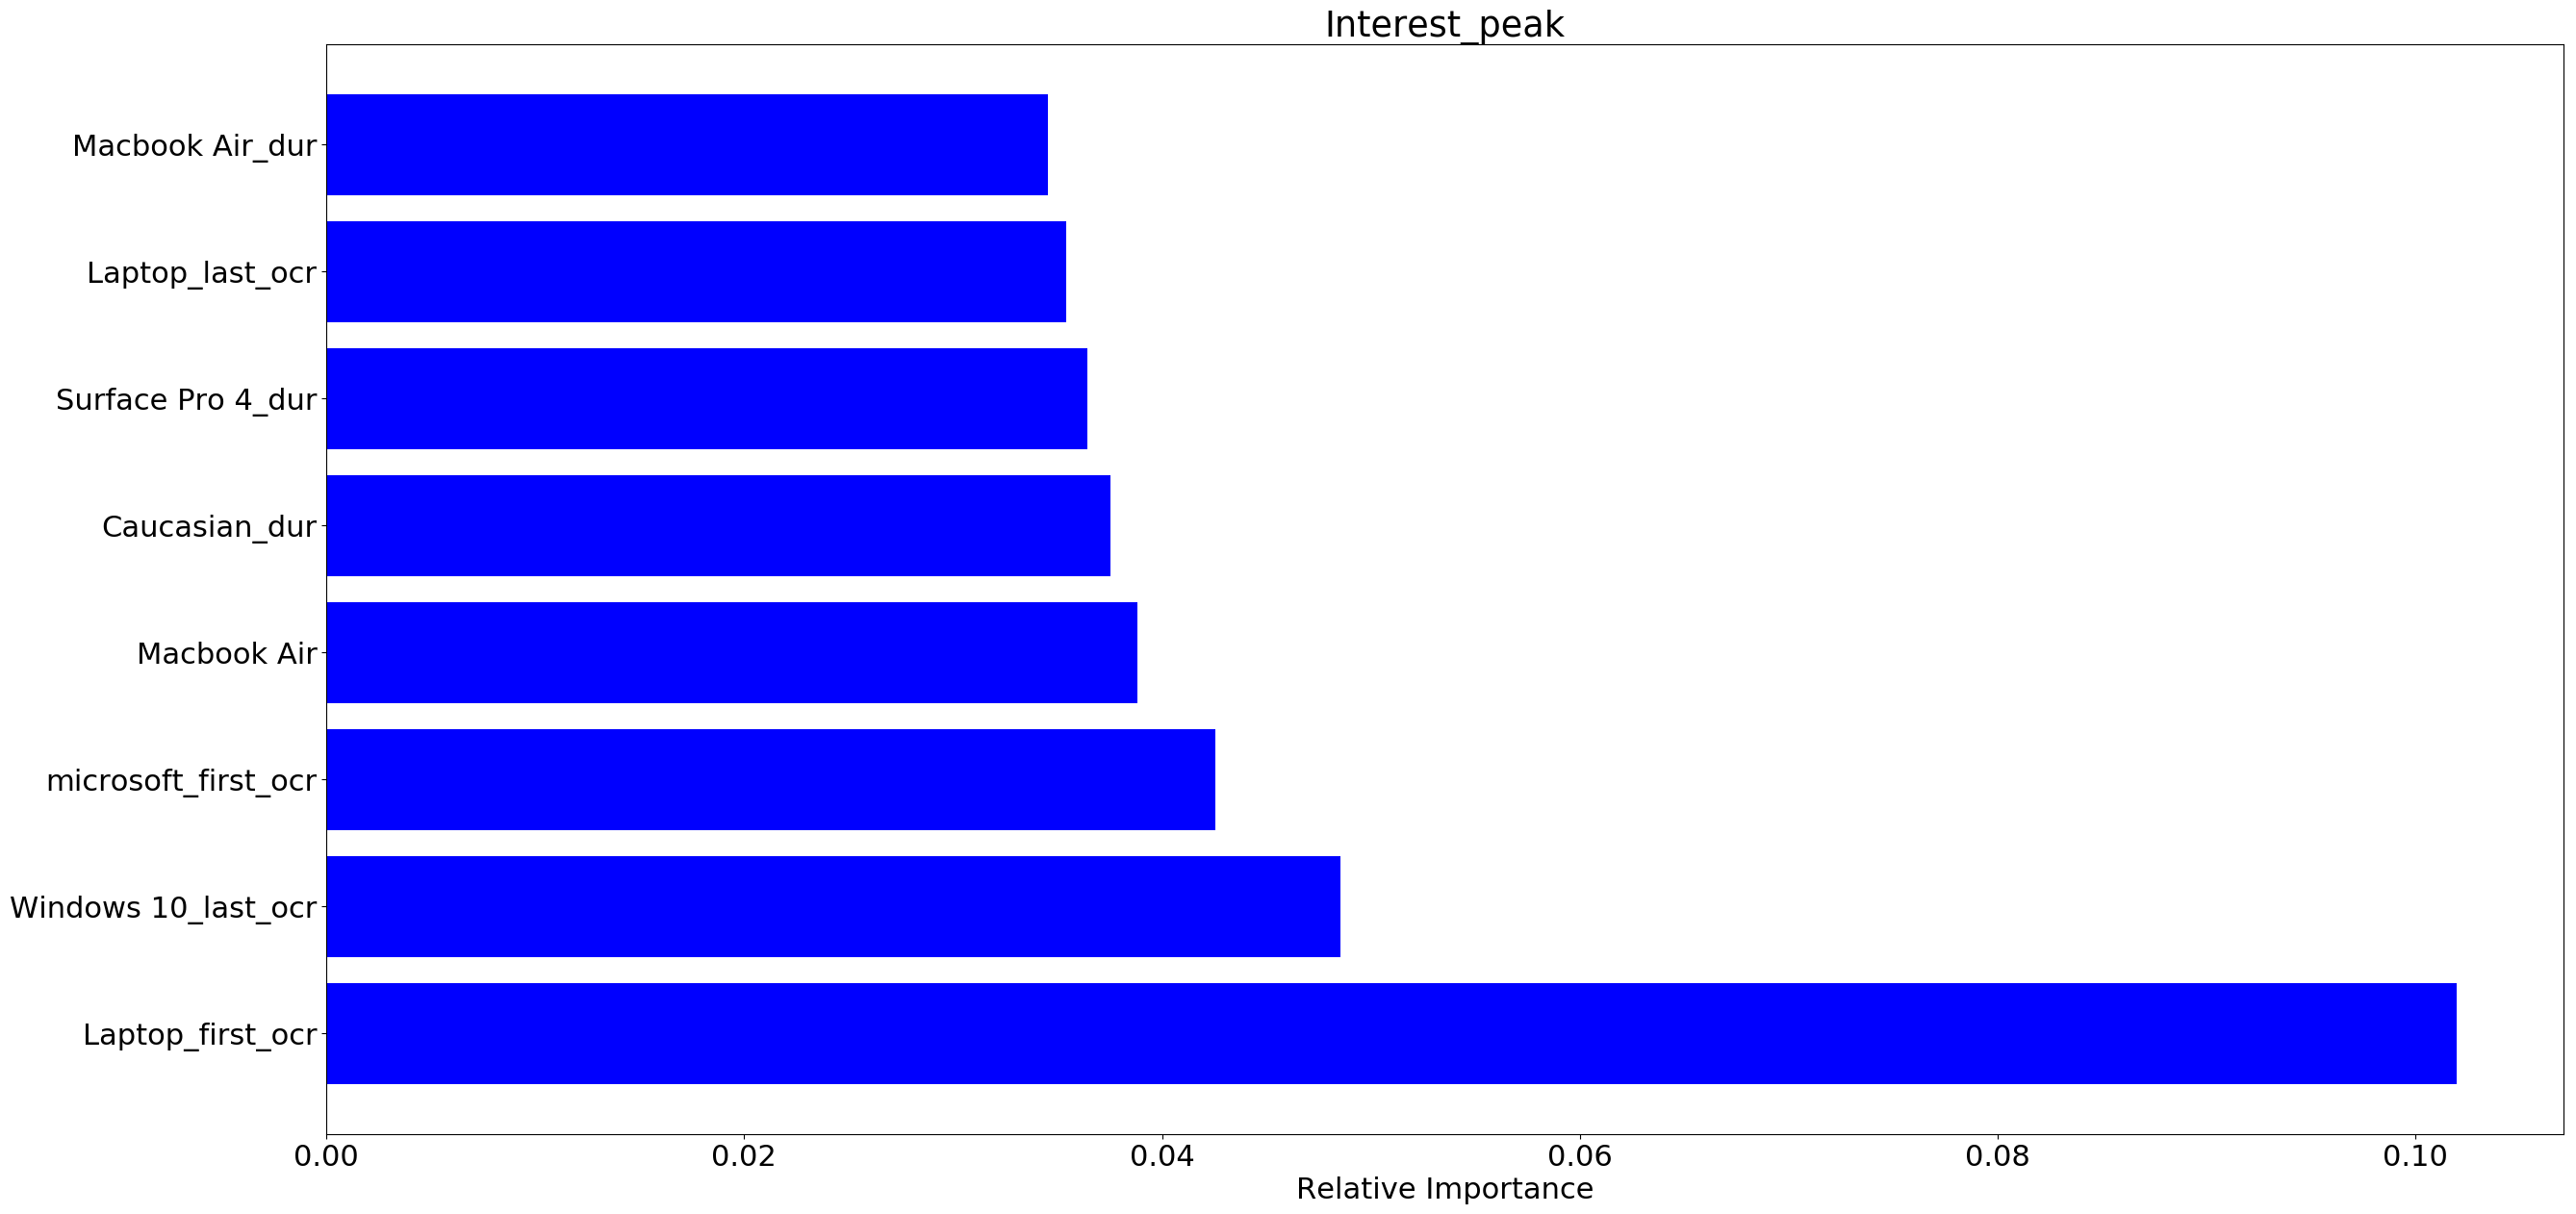

Interest_mean_score
Feature ranking:
1. Laptop_last_ocr (0.095827)
2. microsoft_first_ocr (0.071161)
3. microsoft_last_ocr (0.061411)
4. length_of_ad_15 (0.037845)
5. microsoft (0.030292)
6. Laptop_total_ocr (0.027003)
7. microsoft_dur (0.026511)
8. Laptop_first_ocr (0.026422)
9. Windows (0.025400)
10. Happiness_length_of_ad_impact (0.023727)
11. Age: 25-34_dur (0.023354)
12. Windows 10, Windows_dur (0.021223)
13. Surface Book (0.020887)
14. Windows_dur (0.020881)
15. Happiness_dur (0.020243)
16. Surface Book_dur (0.018902)
17. Laptop (0.018107)
18. Caucasian_dur (0.017962)
19. Windows 10, Windows (0.017904)
20. HP Spectre x360, Windows (0.017605)
21. Laptop_dur (0.017477)
22. Male_dur (0.017262)
23. Neutral_dur (0.017215)
24. Age: 35-44_dur (0.017198)
25. Windows 10_first_ocr (0.016767)
26. Tablet_last_ocr (0.016450)
27. Eastasian_dur (0.015809)
28. HP Spectre x360, Windows_dur (0.015427)
29. Windows 10_last_ocr (0.014599)
30. Windows 10_dur (0.014299)
31. Windows 10 (0.013702)
32. Af

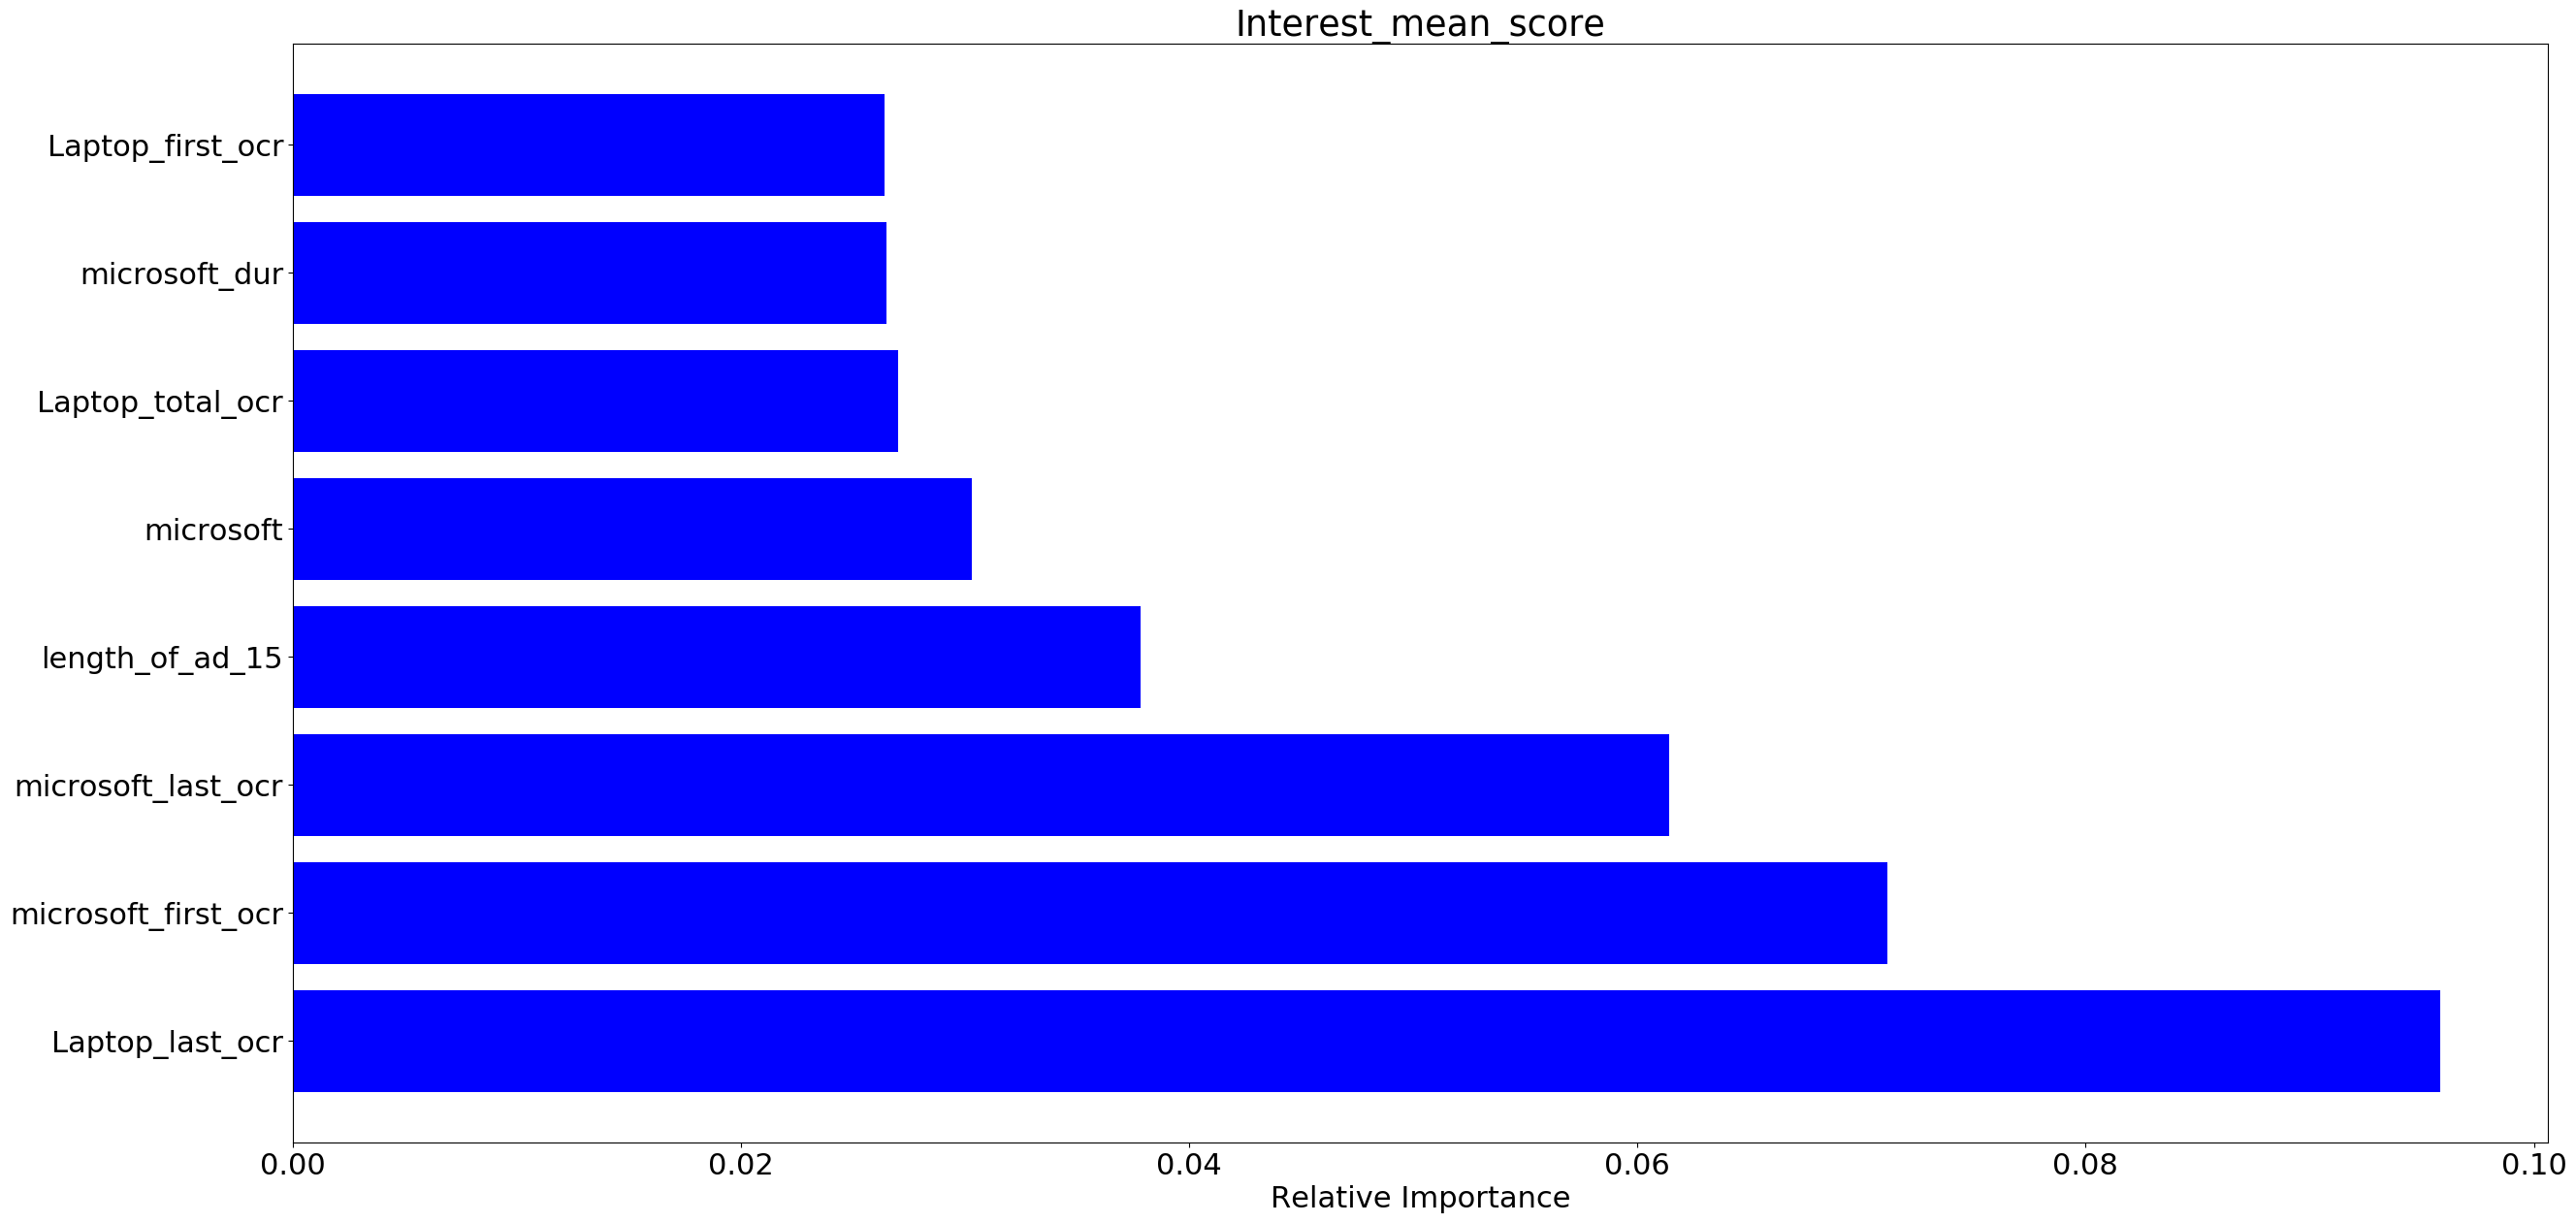

Interest_peak_frames
Feature ranking:
1. Laptop_first_ocr (0.104695)
2. microsoft_first_ocr (0.049944)
3. Windows 10_last_ocr (0.045457)
4. Surface Pro 4_dur (0.041924)
5. Macbook Air (0.041551)
6. Macbook Air_dur (0.036788)
7. Laptop_last_ocr (0.036196)
8. Caucasian_dur (0.035233)
9. Windows 10 PC_dur (0.033841)
10. Laptop_total_ocr (0.033154)
11. Surface Pro 4 (0.032993)
12. Windows 10_first_ocr (0.031933)
13. Neutral_dur (0.030257)
14. Windows 10 PC (0.029374)
15. microsoft_last_ocr (0.025165)
16. Sadness_dur (0.025076)
17. Laptop_dur (0.023166)
18. microsoft (0.021408)
19. Tablet_first_ocr (0.021019)
20. Laptop (0.020470)
21. Age: 25-34_dur (0.019765)
22. Male_dur (0.016342)
23. microsoft_dur (0.015785)
24. Happiness_dur (0.015245)
25. Female_dur (0.015104)
26. Happiness_length_of_ad_impact (0.014537)
27. Windows 10 (0.013917)
28. African_dur (0.011939)
29. Eastasian_dur (0.011509)
30. Windows 10_dur (0.011077)
31. HP Spectre x360_dur (0.009295)
32. HP Spectre x360 (0.009092)
33. T

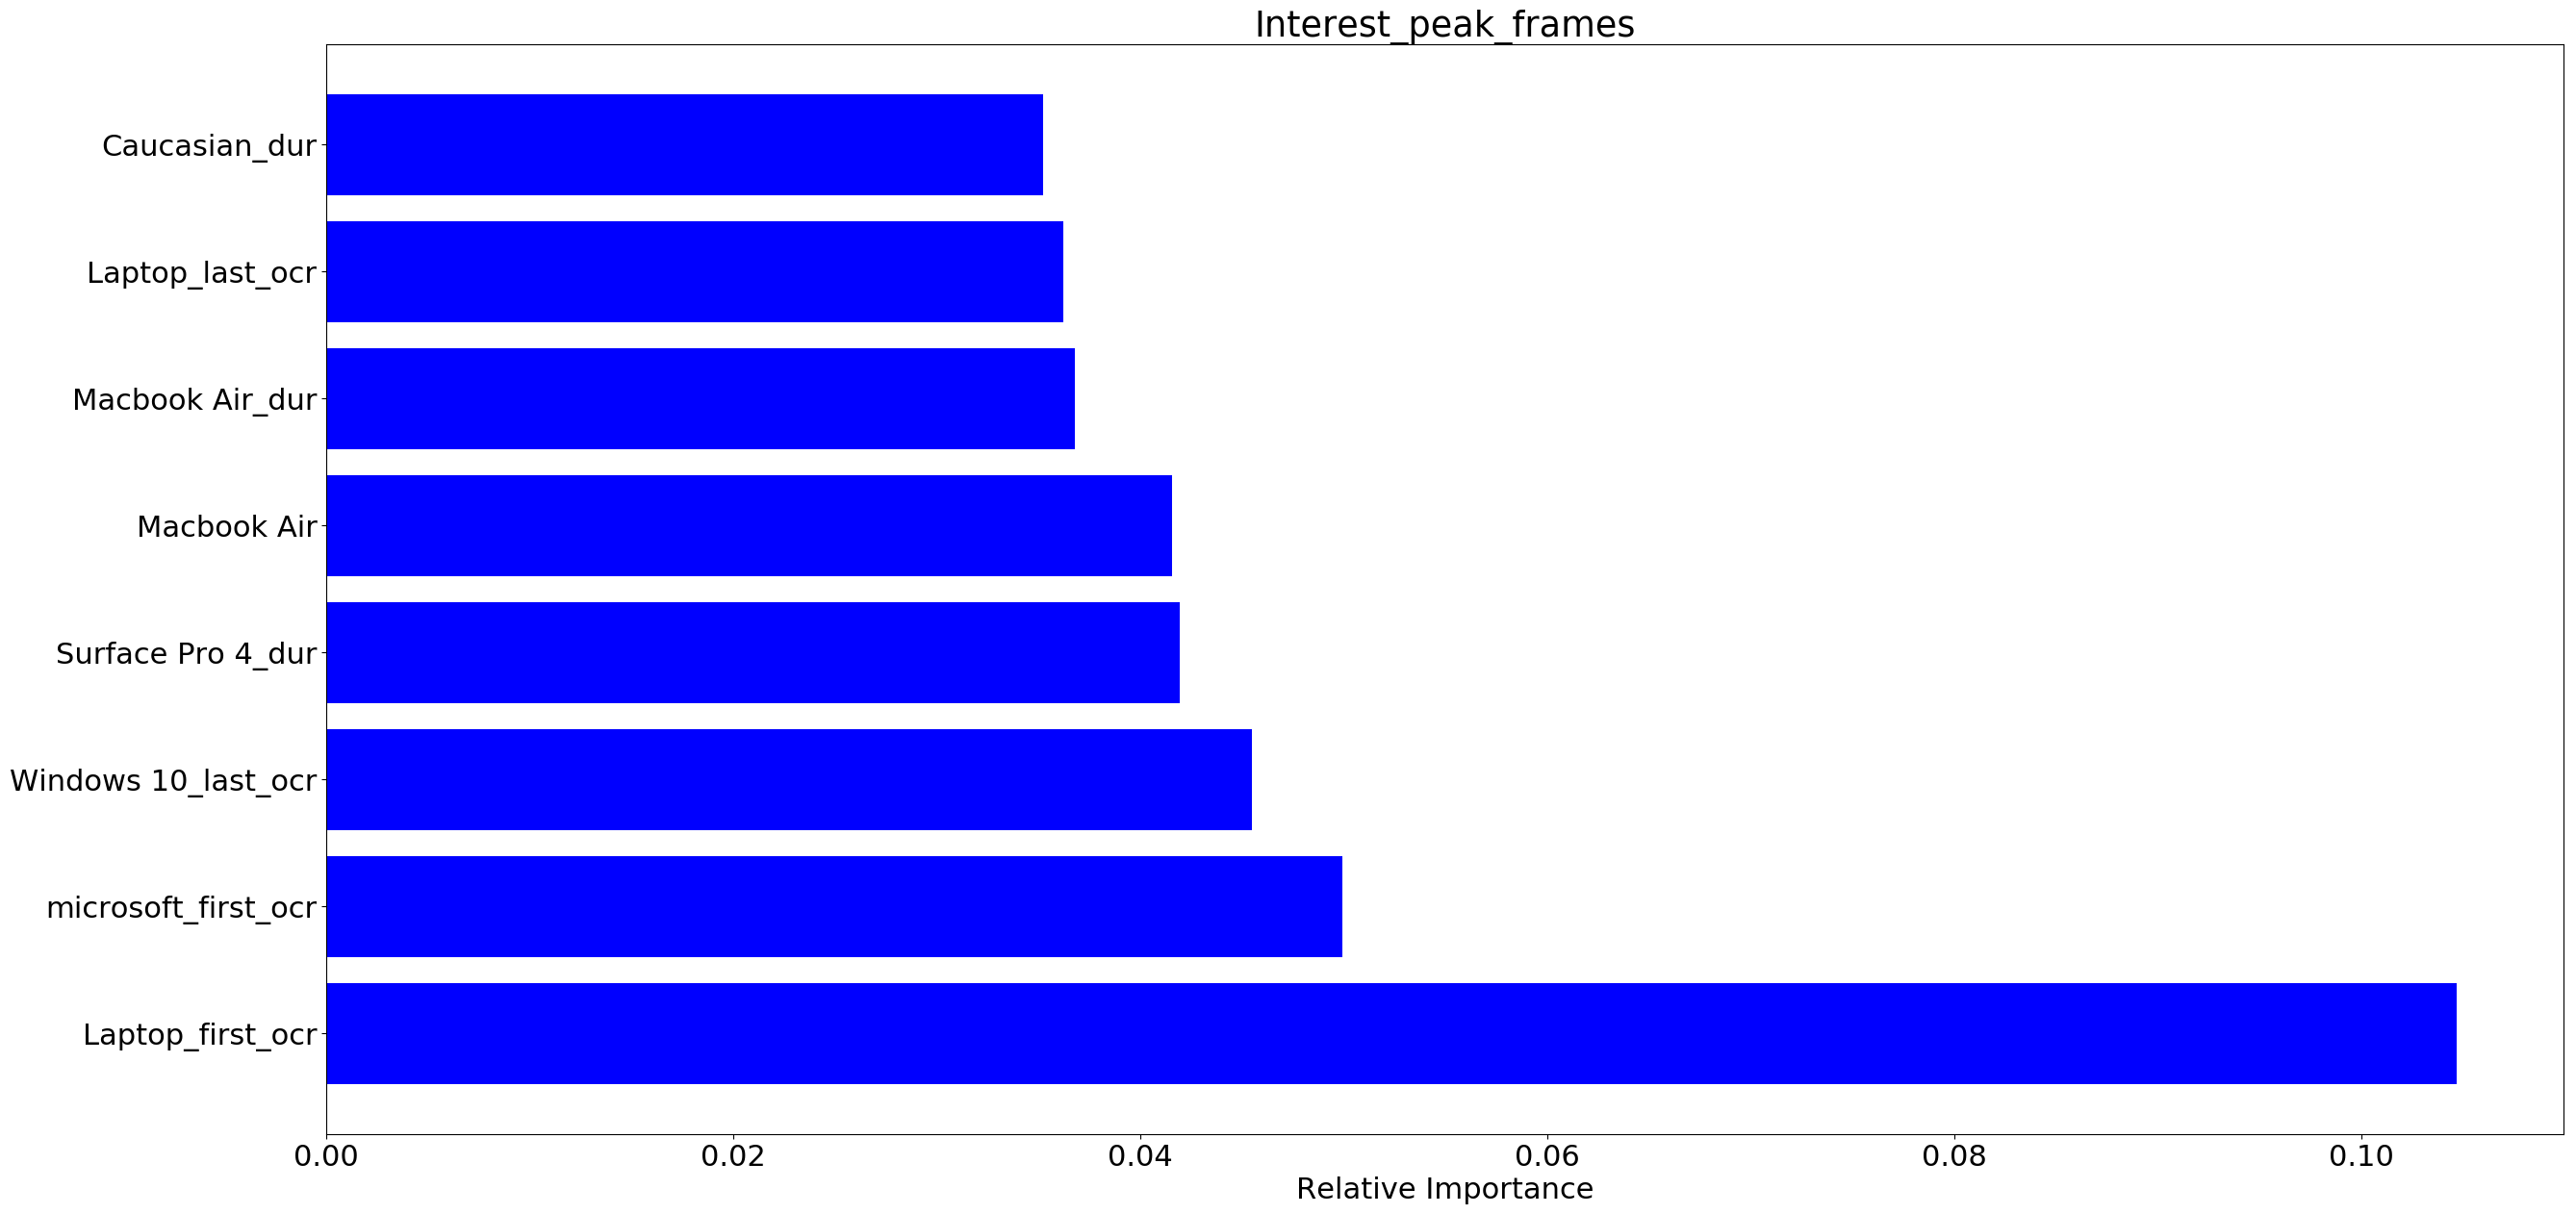

In [276]:
model.plot_feature_importanceortance(models,10,y_test.columns[:],X_test.columns[1:],savefig=False)

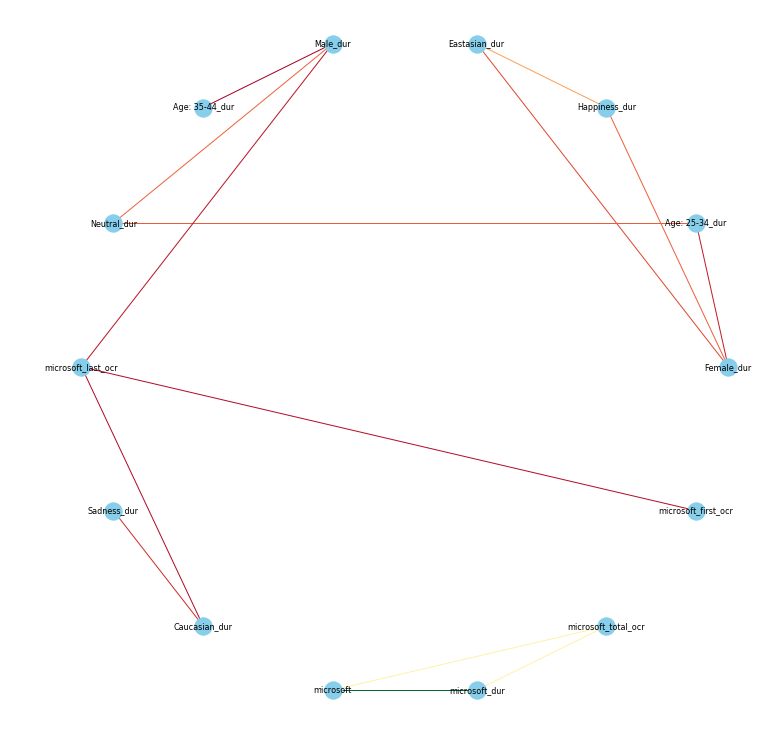

In [31]:
model.preprocessing.correlation(X.drop('Video Name',1).iloc[:,:20],per=0.4)

In [ ]:
# params = {'max_depth': [5,10,13,15,20,30,50,100], 'max_features': [0.2,0.25,0.3,0.4,0.5,0.6], 'min_samples_leaf': [2,4],'presort':[True,False]}
# model.gridSearchCV(parameters=params,X_df=X_train.drop('Video Name',1),y_df=y_train['Aided_Branding__Mean'],cv=3)

In [51]:
shap.initjs()
explainer=[]
shap_values=[]
for i in range(4):
    explainer.append(shap.TreeExplainer(models[i]))
    shap_values.append(explainer[-1].shap_values(X_train.drop('Video Name',1)))
    print(i)

0
1
2
3


In [82]:
# shap.initjs()
# explainer= shap.TreeExplainer(models[7])
# shap_values= explainer.shap_values(X_train.drop('Video Name',1))

In [51]:
models[0]

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=0.6,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=123, splitter='best')

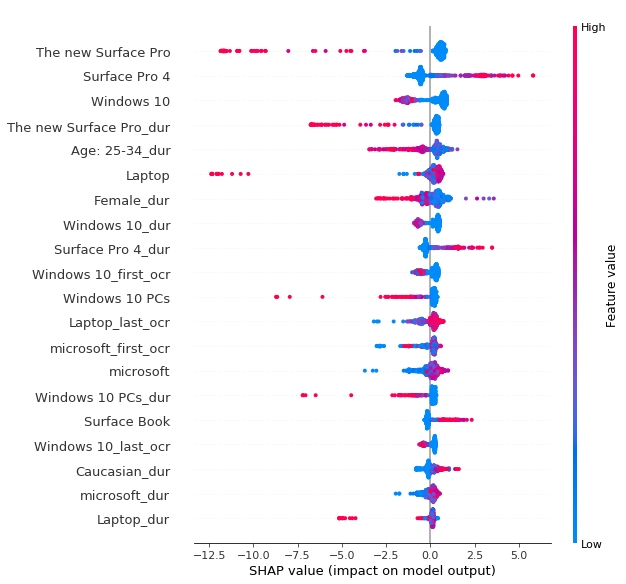

In [54]:
shap.summary_plot(shap_values[3],X_train.drop('Video Name',1))

In [338]:
X_train['Video Name'][(X_train['Video Name'].isna())== False]

9                       208 Win10_US_15_Toney Drawing_TV
82                Bug Chicks Inking - SW Win 10 15 TV US
64                    Angela Inking - SW Win 10 15 TV US
119                    Tim Flach - Surface Book 30 TV US
110                  News Go fast - Surface SP4 30 TV US
121                          Trey - Surface SP4 30 TV US
40                       250 Surface Pro_AUS_30_Bujar_TV
124                          Victoria - ATL SP4 30 TV US
34           241 Surface Laptop_US_30_Brodie FINAL GP_TV
21                    220 Surface Laptop_US_15_Brodie_TV
120                  Tim Flach Power - Surface 15 OLV US
127                   Yasmin Power - ATL Win 10 15 TV US
80                 Bug Chicks Hello - SW Win 10 15 TV US
22     221 BATCH RE-TEST: Surface Book_US_30_Jorge/Sa...
122                    Trey Power - Surface SP4 15 TV US
66                         Ariela - Surface SP4 30 TV US
84            College Girls Cortana - SW Win 10 15 TV US
101                       Mancu

In [339]:
# for i in range(11):
i=0
j=660

print("\n",Y.columns.values[i])
shap.force_plot(explainer[i].expected_value, shap_values[i][j,:], X_train.drop('Video Name',1).iloc[j,:])


 Unaided_Branding


In [136]:
X_train['microsoft'].min()

0.0

In [150]:
X_train['Windows 10'].max()

11.0

In [147]:
X_train[X_train['Windows 10_first_ocr'] ==X_train['Windows 10_first_ocr'].min()]

Video Name  Country_US  length_of_ad_15  \
498                                         NaN    1.000000                0   
243                                         NaN    0.884755                0   
202                                         NaN    0.411160                0   
306                                         NaN    1.000000                0   
166                                         NaN    1.000000                0   
724                                         NaN    1.000000                1   
263                                         NaN    1.000000                0   
326                                         NaN    1.000000                0   
150                                         NaN    1.000000                0   
469                                         NaN    1.000000                0   
9              208 Win10_US_15_Toney Drawing_TV    1.000000                1   
254                                         NaN    1.000000                0   
952                                         NaN    1.000000                1   
379                                         NaN    0.867482                0   
581                                         NaN    1.000000                1   
64           Angela Inking - SW Win 10 15 TV US    1.000000                1   
767                                         NaN    1.000000                1   
528                                         NaN    1.000000                0   
449                                         NaN    0.000000                0   
119           Tim Flach - Surface Book 30 TV US    1.000000                1   
777                                         NaN    1.000000                1   
664                                         NaN    1.000000                1   
518                                         NaN    1.000000                0   
711                                         NaN    1.000000                1   
121                 Trey - Surface SP4 30 TV US    1.000000                1   
712                                         NaN    1.000000                1   
543                                         NaN    0.743961                0   
492                                         NaN    0.731838                0   
858                                         NaN    1.000000                1   
399                                         NaN    1.000000                0   
..                                          ...         ...              ...   
996                                         NaN    1.000000                1   
39               249 Surface Pro_UK_30_Bujar_TV    0.000000                0   
340                                         NaN    0.857628                0   
2                      201 Win10_UK_30_Toney_TV    0.000000                0   
451                                         NaN    1.000000                0   
823                                         NaN    1.000000                1   
817                                         NaN    1.000000                1   
68             Beowulf Pen - SW Win 10 15 TV US    1.000000                1   
608                                         NaN    1.000000                1   
420                                         NaN    0.744995                0   
846                                         NaN    1.000000                1   
339                                         NaN    0.267863                0   
224                                         NaN    0.459517                0   
942                                         NaN    1.000000                1   
47      274 Surface Laptop_US_30_Courtney v2_TV    1.000000                0   
113             Quads Pen - ATL Win 10 15 TV US    1.000000                0   
96         Jorge Sandra - Surface Book 30 TV US    1.000000                1   
737                                         NaN    1.000000                1   
214                                  

In [139]:
k = X_train[X_train['Latino_dur'] == X_train['Latino_dur'].max()].iloc[0]

In [140]:
shap.force_plot(explainer[i].expected_value, shap_values[i], X_train.drop('Video Name',1))

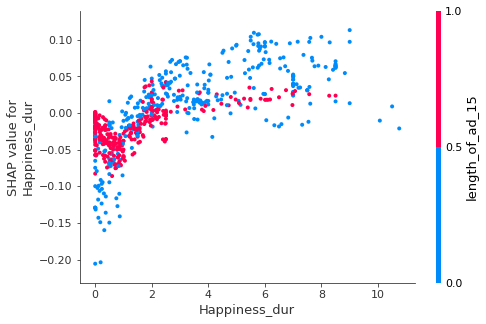

In [33]:
shap.dependence_plot("Happiness_dur",shap_values,X_train.drop('Video Name',1))

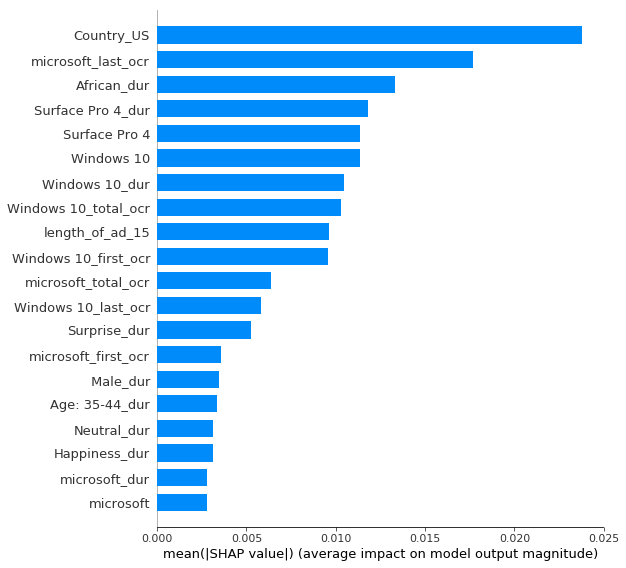

In [37]:
shap.summary_plot(shap_values[5],X_train.drop('Video Name',1),plot_type="bar")

In [32]:
for i,target in enumerate(y_train.columns.values):
    dot_data = tree.export_graphviz(models_dt[i], out_file=None,
                                    feature_names=X_train.drop('Video Name',1).columns.values,
                                    class_names=y_train.columns.values,
                                    filled=True, rounded=True,special_characters=True)
    graph = graphviz.Source(dot_data)  
    graph.render(target)    

In [30]:
y_train.columns.values[0]

'Unaided_Branding'

In [26]:
corr = X_res.drop('Video Name',1).corr()

In [77]:
mapper.to_rgba(links['value'][2])

(0.5171856978085352, 0.5171856978085352, 0.5171856978085352, 1.0)

In [75]:
links['value'][1]

0.4227321573328643

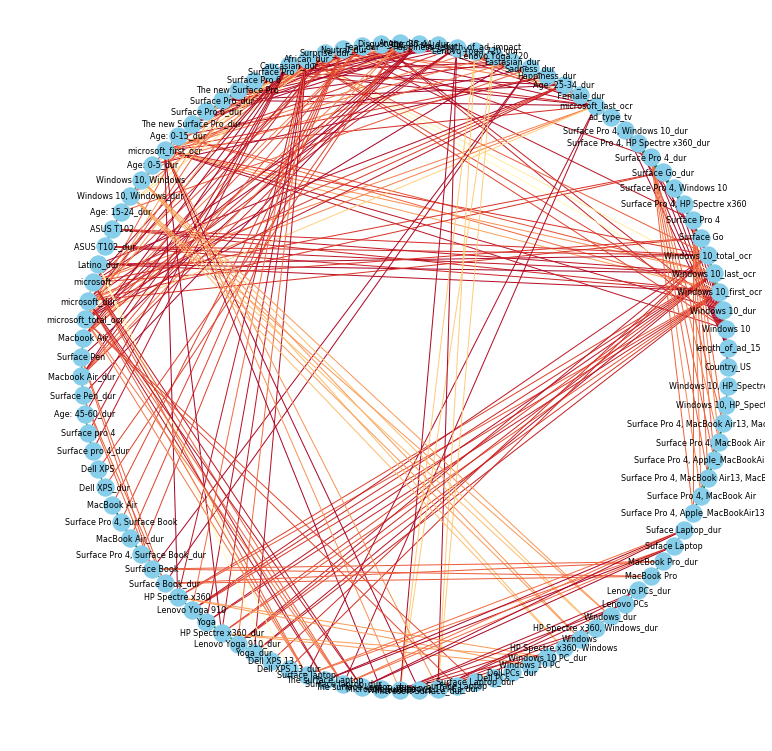

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm


links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.2) & (links['var1'] != links['var2']) ]
 
# Build your graph
# links_filtered = links
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# color_list = 
values=[]
for e in G.edges():
    Y = links_filtered[links_filtered['var1']==e[0]]
    Z = Y[Y['var2']==e[1]]
    values.append(Z['value'].values[0])

minima = min(values)
maxima = max(values)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap="RdYlGn")    

for i,val in enumerate(values):
    values[i] = matplotlib.colors.to_hex(mapper.to_rgba(val))
# color_map = le.fit_transform(values)
plt.figure(figsize=(10,10))
nx.draw_circular(G, with_labels=True,node_color="skyblue",edge_color=values,font_size=8)
plt.savefig('correlation.png')
plt.show()

In [219]:
cm.get_cmap()

In [930]:
import pickle

In [934]:
for i in range(11):
    filename = 'model'+str(i)+'.pkl'
    pickle.dump(models_rf[i],open(filename,'wb'))

In [933]:
models

[DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=0.2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=123, splitter='best')]

In [936]:
X.columns.values

array(['Video Name', 'Country_US', 'length_of_ad_15', 'ad_type_tv',
       ' Female_dur', ' Male_dur', 'Age: 0-15_dur', 'Age: 0-5_dur',
       'Age: 15-24_dur', 'Age: 25-34_dur', 'Age: 35-44_dur',
       'Age: 45-60_dur', 'Angry_dur', 'Disgust_dur', 'Fear_dur',
       'Happiness_dur', 'Neutral_dur', 'Sadness_dur', 'Surprise_dur',
       'African_dur', 'Caucasian_dur', 'Eastasian_dur', 'Latino_dur',
       'microsoft', 'microsoft_dur', 'microsoft_first_ocr',
       'microsoft_last_ocr', 'microsoft_total_ocr', 'ASUS T102',
       'Dell PCs', 'Dell XPS', 'Dell XPS 13', 'HP Spectre x360',
       'HP Spectre x360, Windows', 'Lenovo PCs', 'Lenovo Yoga 720',
       'Lenovo Yoga 910', 'MacBook Air', 'MacBook Pro', 'Macbook Air',
       'Microsoft Surface', 'Suface Laptop', 'Surface Book', 'Surface Go',
       'Surface Laptop', 'Surface Pen', 'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       

In [1116]:
features_ = ['microsoft_first_ocr',
'Lenovo Yoga 910_dur',
'Lenovo Yoga 910',
'Surface Pro 4_dur',
'Windows 10',
'ASUS T102_dur', 
' Female_dur',
'Windows 10_total_ocr',
' Male_dur',
'Lenovo Yoga 910',
'ASUS T102_dur',
'ASUS T102',
'Surface Pro 4',
'microsoft_first_ocr',
'microsoft_last_ocr',
'The new Surface Pro_dur', 
'The new Surface Pro',
' Male_dur',
'Age: 15-24_dur',
'microsoft_first_ocr',
' Male_dur',
'Age: 25-34_dur',
'ASUS T102_dur',
'Age: 25-34_dur',
' Male_dur', 
'The new Surface Pro_dur',
'microsoft_first_ocr',
'The new Surface Pro', 
'Surface Laptop',
'HP Spectre x360, Windows',
 'ASUS T102_dur',
'ASUS T102', 
'Neutral_dur',
'The new Surface Pro',
'Dell XPS 13',
 'HP Spectre x360, Windows_dur', 
'Happiness_dur',
'microsoft_total_ocr',
'microsoft_first_ocr',
'microsoft_last_ocr',
'The new Surface Pro_dur',
'Age: 25-34_dur',
'ASUS T102', 
'ASUS T102_dur',
'microsoft_first_ocr',
'Happiness_dur',
'Neutral_dur',
'microsoft_last_ocr',
'microsoft_last_ocr',
'length_of_ad_15',
 'microsoft_first_ocr', 
'The new Surface Pro_dur',
'The new Surface Pro', 
 'Caucasian_dur',
 'microsoft_dur',
'Happiness_dur',
'Windows 10_dur',
'microsoft_last_ocr',
'length_of_ad_15',
'Windows 10',
'Happiness_dur',
'The new Surface Pro', 
'microsoft',
'Caucasian_dur',
'microsoft_last_ocr', 
 'Windows 10', 
'Windows 10_dur',
'length_of_ad_15', 
 'African_dur',
'microsoft_first_ocr', 
'Age: 35-44_dur',
'Age: 25-34_dur',
'Windows 10_first_ocr',
'Windows 10_total_ocr',
'microsoft_last_ocr' ,
'Age: 25-34_dur',
"African_dur",
'Windows 10',
'Surface Pro 4',
'Windows 10_first_ocr',
'length_of_ad_15',
'microsoft_last_ocr', 
'Country_US', 
'length_of_ad_15', 
'Windows 10',
 'Windows 10_dur',
'Surface Pro 4_dur',
 'Surface Pro 4',
'African_dur',
'Country_US',
'microsoft_last_ocr', 
'length_of_ad_15', 
'Windows 10',
'Surface Pro 4',
'microsoft_total_ocr',
'African_dur',
'Neutral_dur',
'Windows 10_dur','Country_US','microsoft_last_ocr', 'Windows 10_dur','microsoft_last_ocr', 
 'Windows 10','Surface Go','Country_US','Country_US','length_of_ad_15', 
 'microsoft_first_ocr',' Male_dur','microsoft_first_ocr','Windows 10','Windows 10_dur',
 'microsoft_last_ocr','Surface Go_dur','microsoft_total_ocr','Surface Go_dur','Windows 10', 
'length_of_ad_15','Latino_dur','Eastasian_dur','Surface Go','microsoft_first_ocr',
'African_dur','microsoft_dur','Surface Go','Windows 10, Windows','Age: 25-34_dur',
'Country_US',' Female_dur','ASUS T102','microsoft_total_ocr','African_dur',
'Windows 10_last_ocr','Caucasian_dur','African_dur','The new Surface Pro','Windows 10_first_ocr',
'Windows 10_first_ocr','microsoft_dur','Windows 10_total_ocr',
'length_of_ad_15',' Female_dur','microsoft_first_ocr',' Female_dur','Age: 25-34_dur',
'Country_US','Country_US','length_of_ad_15','Surface Go','Windows 10',
'African_dur',' Male_dur','Country_US','Country_US','length_of_ad_15',
'Windows 10','Age: 25-34_dur','microsoft','Windows 10_first_ocr','Country_US',
'microsoft_last_ocr','microsoft','African_dur','microsoft_last_ocr','microsoft_last_ocr', 
'microsoft_first_ocr','Caucasian_dur','Windows 10','microsoft','Happiness_dur',
'Neutral_dur','Neutral_dur','microsoft_dur','Neutral_dur','Windows 10_first_ocr',
'Latino_dur','microsoft_last_ocr','Windows 10','Surface Laptop'
]

In [1117]:
feature_df = pd.DataFrame(features_,columns=['Important Feature'])

In [1118]:
duplicates_removed = feature_df.drop_duplicates()

In [1119]:
cnt_df = pd.DataFrame(columns=[target_col])

In [1120]:
target_col =['Feature']
dict_ = {'Feature':['test']}
for col in y_train.columns.values:
    target_col.append(col)
    dict_[col] = [0]

In [979]:
for col in target_col[1:]:
    X[col] = Y[col]

In [1042]:
dict_

{'Feature': ['test', 'test2'],
 'Unaided_Branding': [0],
 'Brand_Cues__Mean': [0],
 'Aided_Branding__Mean': [0],
 'Active_Involvement__Mean': [0],
 'New_Information__Mean': [0],
 'Enjoyment__Mean': [0],
 'Brand_Appeal__Mean': [0],
 'Understanding__Mean': [0],
 'Relevance_of_Information__Mean': [0],
 'Credibility_of_Information__Mean': [0],
 'Brand_Difference__Mean': [0]}

In [1121]:
for i,col in enumerate(duplicates_removed.values):
    print(i)
    Y = X[X[col[0]].isna()==False]
    dict_['Feature'].append(col[0])
    for target in target_col[1:]:
        Z = (Y[target].isna()== False).sum()
#         print(Z)
        dict_[target].append(Z)
#         print(dict_)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [1123]:
cnt_df =pd.DataFrame(dict_)

In [1125]:
cnt_df = cnt_df.iloc[1:,:]

In [1126]:
cnt_df.to_excel(cnt_df)

TypeError: to_excel() missing 1 required positional argument: 'excel_writer'

In [1002]:
duplicates_removed.values[0]

array(['microsoft_first_ocr'], dtype=object)

In [ ]:
explainer_xgb=[]
shap_values_xgb=[]
for i in range(11):
    explainer_xgb.append(shap.TreeExplainer(models[i]))
    shap_values_xgb.append(explainer_xgb[-1].shap_values(X_train.drop('Video Name',1)))
    print(i)